# Gas Discharge & Stellar Feedback-driven Outflows (Part 2 / 2):
## Scaling, Fractional Heating, Accretion
`-- Leo Lonzarich, 31 October 2021 // [Updated 2-11-21] --`


### Table of Contents
- [Analysing Discharged Gas](#compare)
    - [Radial Position Scaling](#radialpositions)
    - [Radial Velocity Scaling](#velocities)
- [Fractional Heating](#fractional)
    - [Fraction SNe-Heated](#fractionsne)
    - [Fraction Ram Pressure-stripped](#fractionram)
- [Accretion of Discharged Gas](#accretion)
- [The Proving Grounds](#proving)


### General Comments on the Contents of this Noteboook
- Repeated pids that turn up in the data sets below (e.g. 'ejected,' 'expelled,' 'discharged') should mean that the same particle has been accreted and reejected more than once --- hence its reoccurance in the set.


- While each root data set is defined where used, definitions are included here for convenience:
    - *Ejected*: All gas partiles that have been removed from their respective satellite galaxy's disk and into the halo.
    - *Expelled*: All gas particles (either within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas that has been completely removed from its respective satellite.
    - *Discharged*: All gas that has been removed from the disk of its respective satellite galaxy. This includes gas both moved to the halo and beyond the virial radius.
    - *predischarged*: This is essentially a data set containing the pre-properties of the discharged gas, that is, it contains all of those gas particles in the *discharged* set but with their properties before being discharged.
    - *dsrg_accreted*: **fill in**
    
    
- Units for key values used in this notebook:
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kiloparsecs per year $(kpc \ yr^{-1})$.
    - *Masses* in Solar masses $(Msol)$.

In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 

In [2]:
path = '/home/lonzaric/astro_research/Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), 'Available Keys:', *keys)

19 Available Keys: h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


## The 'Discharged' Gas: Comparing Heated Vs. All <a class="anchor" id="compare"></a>

____
____

Here we commit to a similar treatment performed in *Stellar_Feedback_p1* where 'all' and 'heated' discharged gas divisions were compared. However, where we diverge here is that we scale radial positions of gas particles by the radius of their respective satellite galaxy's radius. That is, for each particle, we will have
$$
r_{eff} = r/R_{disk}
$$
for each particle, where $r_{eff}$ is the effective radius, $r$ is the radial position, and $R_{disk}$ is the radius of the relevant satellite's disk. Similarly, for velocities we commit to two different scalings
$$
v_{eff} = v/v_{vir} \text{  and  } v_{eff} = v/v_{esc} 
$$
where $v$ is the radial velocity, $v_{vir}$ is the satellite's virial velocity, and $v_{esc}$ is the escape velocity for the particle.

### Radial Position Scaling <a class="anchor" id="radialpositions"></a>

We begin by applying the scaling above for radial positions.


In [3]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [5]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

In [6]:
# data has precalculated key 'r_per_Rvir' that we will use for our position computations; we unpack it here.

pre_rR = predischarged.r_per_Rvir
all_rR = discharged.r_per_Rvir
acc_rR = accreted.r_per_Rvir
preheat_rR = preheated.r_per_Rvir
hot_rR = heated.r_per_Rvir

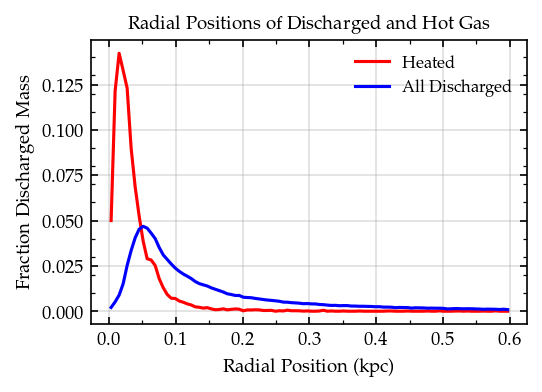

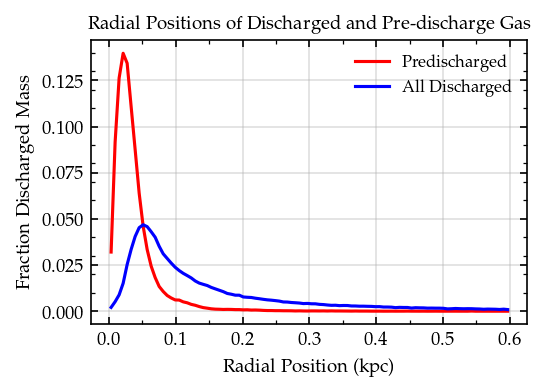

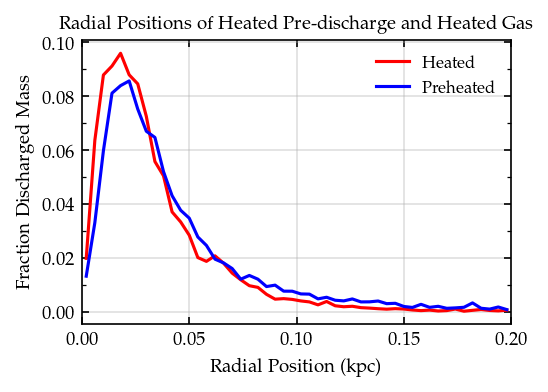

In [11]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position (kpc)')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(0,1)
# ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))


ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_rR, bins=bins, weights=predischarged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Predischarged', c='r')

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0, 0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position (kpc)')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(0,1)
# ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 50
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1_hot, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0, 0.2))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1_hot, label='Heated', c='r')

# preheated
y1, x = np.histogram(preheat_rR, bins=bins, weights=preheated.weight, range=(0, 0.2))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Preheated', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position (kpc)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(0,0.2)
# ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

So, the first two plots above essentially echo what we have already seen in `StellarFeedback_p1`. However, this third plot is on initial viewing, suspicious. It would appear that the radial positions for hot gas before discharge nearly match those for this gas after being discharged.

In [7]:
print('The minimum preheated ratio is', preheat_rR.min(), 'and the minimum heated ratio is ', hot_rR.min())

The minimum preheated ratio is 0.0002051885167676295 and the minimum heated ratio is  0.0005076476118961308


So on viewing the stats on these two datasets, things would appear to be in order. Nonetheless, it is interesting to find that SNe-heated gas is discharged, on the average, only very short distances.


### Comparing Radial Velocities ($v_{vir}$)<a class="anchor" id="velocities"></a>

We first start scaling velocities according to $v_{eff} = v/v_{vir}$ using the key ``

In [63]:
discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'angle', 'key', 'weight'],
      dtype='object')

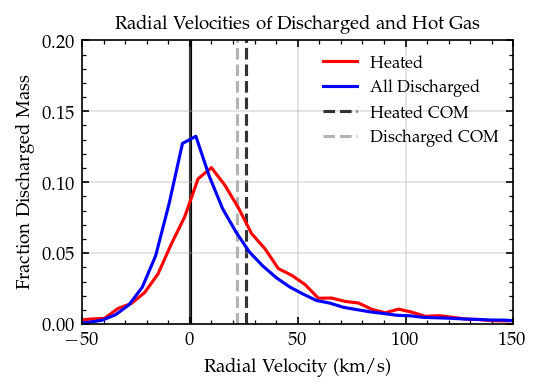

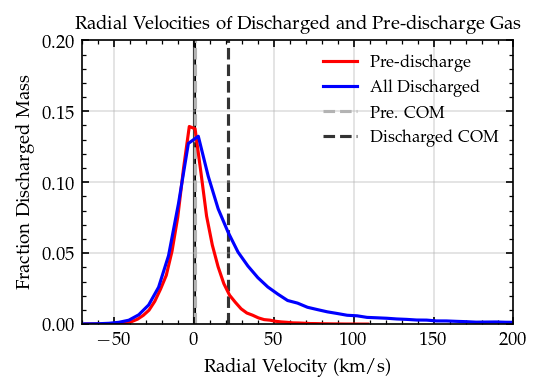

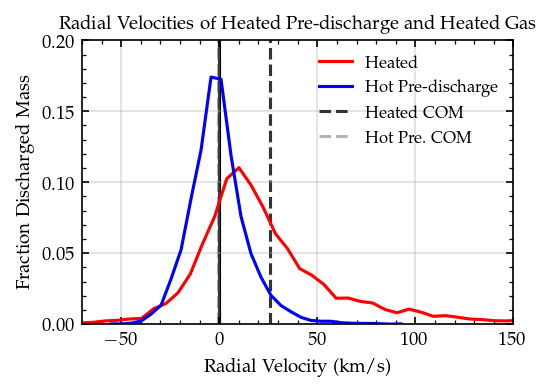

In [24]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radvel, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

The radial centers of mass are again included to better detail the velocity at which the bulk of each gas group is traveling.

All particles are moving out/into the the center of the satellites nearly uniformly, with slight bias towards exiting, as we should expect.

The second plot is particcularly telling of the validity in data collection --- that is, the bulk of gas, before being discharged, has a radial velocity of 0 $km/s$ relative to the center of the satellite galaxies.

### Comparing Radial Velocities ($v_{esc}$)<a class="anchor" id="velocities"></a>

We first start scaling velocities according to $v_{eff} = v/v_{esc}$, where we can calculate the escape velocity for each particle by the familiar relation
$$
v_{esc} = \sqrt{\frac{2GM}{r}},
$$
where $G$ is the gravitational constant, $M$ is the mass contained within $R_{vir}$ of the respective satellite, and $r$ is the radial position of the particle.

In [45]:
discharged.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 'angle', 'key', 'weight',
       'Ve'],
      dtype='object')

In [12]:
# computing escape velocity key for each discharge dataset.

# grav constant in units of kpc**3 Msol**-1 yr**-2.
G = 4.53943e10-24

predischarged['Ve'] = np.sqrt(2 * G * predischarged.sat_Mgas / predischarged.r)
discharged['Ve'] = np.sqrt(2 * G * discharged.sat_Mgas / discharged.r)
accreted['Ve'] = np.sqrt(2 * G * accreted.sat_Mgas / accreted.r)
preheated['Ve'] = np.sqrt(2 * G * preheated.sat_Mgas / preheated.r)
heated['Ve'] = np.sqrt(2 * G * heated.sat_Mgas / heated.r)

In [13]:
# effective velocities using the above keys.
pre_veff = predischarged.v / predischarged.Ve
all_veff = discharged.v / discharged.Ve
acc_veff = accreted.v / accreted.Ve
preheat_veff = preheated.v / preheated.Ve
hot_veff = heated.v / heated.Ve

In [44]:
import math

for i in range(0, len(discharged)):
    print(all_veff[i])
    #     if discharged.v[i] / discharged.Ve[i] == np.inf:
#         print(v_eff, 'with index', i,'is infinity.')
    i += 1

0    3.623124e-08
0    1.303206e-07
0    7.888817e-08
0    2.807151e-08
0    1.436101e-08
0    4.064390e-07
0    5.175407e-08
0    5.193551e-08
dtype: float64
1    1.134841e-07
1    3.616420e-09
1    7.300603e-08
1    2.947578e-08
dtype: float64
2    4.286948e-08
2    7.104839e-09
2    7.690042e-09
2    1.203756e-08
2    8.417574e-09
2    7.022476e-09
2    1.344770e-08
2    5.348013e-09
2    4.595341e-07
2    4.975599e-09
2    2.043855e-08
2    2.957537e-07
2    6.434902e-08
dtype: float64
3    6.152873e-07
3    9.348705e-09
3    7.647344e-08
3    7.282368e-09
3    1.849122e-08
3    3.551201e-09
3    9.483161e-09
3    1.185786e-08
3    1.777319e-08
dtype: float64
4    1.737184e-08
4    7.972958e-08
4    8.106606e-08
4    1.879906e-08
4    7.827068e-08
4    4.194825e-09
4    1.972094e-06
dtype: float64
5    4.425540e-09
5    8.463146e-07
5    3.031505e-08
5    1.308229e-08
dtype: float64
6    2.360155e-08
6    2.451398e-08
6    1.729781e-08
6    7.939545e-07
6    6.538412e-09
6    6.734

113             inf
113    2.075225e-08
113             inf
113    1.039855e-08
113    5.099703e-08
113    2.315642e-08
113    3.382416e-08
113    4.060183e-09
113    2.247402e-08
113    8.022458e-09
113    4.951710e-09
113    4.243292e-08
113    2.900014e-08
dtype: float64
114    1.235809e-08
114    1.155542e-07
114    1.150021e-08
114    2.736626e-09
114    6.037322e-09
114    5.144225e-09
114    9.297803e-09
114    2.539596e-08
114    1.103087e-08
114    4.324430e-08
114    8.213754e-09
114    2.079511e-09
114    6.419173e-09
114    1.244257e-08
114    2.377284e-06
114    1.569082e-08
dtype: float64
115    1.981122e-08
115    1.744512e-07
115    1.182847e-08
115    1.720500e-08
115    5.690920e-09
115    3.199149e-08
115    7.358357e-09
115    8.576816e-09
115    2.346393e-08
dtype: float64
116             inf
116    5.418585e-09
116    3.765181e-09
116    3.913239e-08
116    5.564035e-08
116    7.334258e-09
116    6.090466e-09
116    1.008358e-08
116    1.055827e-08
116    9.052872

239    2.777940e-08
239    1.059293e-07
239    3.249399e-08
239    1.118432e-07
239    3.417783e-08
239    8.353797e-09
239    7.169165e-09
239    2.395179e-08
239    9.587692e-09
239    6.705644e-09
239    3.000114e-09
239    7.553746e-09
239    6.355076e-09
239             inf
239    3.113557e-08
dtype: float64
240    7.676316e-09
240    2.144506e-08
240    3.655811e-08
240    4.307466e-09
240    1.680382e-08
240    4.950402e-09
240    1.219283e-08
240    6.229747e-09
240    4.554049e-09
240    5.175569e-09
240    4.580694e-09
240    9.412531e-08
240    1.223551e-08
240    5.139063e-09
240    5.537518e-09
240    1.153635e-08
240    1.320572e-08
240    9.209032e-08
dtype: float64
241    2.238680e-08
241    1.630245e-06
241    7.970910e-09
241    5.024301e-09
241             inf
241    8.563658e-09
241    2.556465e-08
241    1.166114e-08
241    4.994393e-09
241    7.760914e-08
241    6.200293e-08
241    7.902114e-09
241    1.810632e-08
dtype: float64
242    2.410184e-08
242    5.530736

358    5.599533e-09
358    5.032582e-09
358    8.198100e-09
358    2.096226e-08
358    8.132642e-08
358    1.176873e-08
358    5.560112e-09
358    2.888330e-09
358    2.314425e-09
358    1.051771e-07
358    5.637495e-08
dtype: float64
359             inf
359    6.037321e-09
359    8.006926e-09
359    8.581163e-08
359    2.165702e-08
359    9.305444e-09
359    6.066539e-09
359    5.770614e-09
359    1.820181e-07
359    5.054451e-09
359    7.537310e-09
359    7.198448e-09
359    9.446857e-09
359    4.704459e-08
359    1.400210e-07
359    9.766869e-09
359    1.082370e-08
359    1.066521e-08
359    1.026020e-08
359    7.299717e-08
dtype: float64
360    5.953978e-09
360    2.333692e-08
360    7.237186e-09
360    1.367075e-08
360    5.496472e-09
360    9.136347e-09
360    2.607567e-09
360    1.561710e-08
360    2.523966e-08
360    1.103281e-08
360    4.340168e-07
360    8.331558e-09
360    2.283695e-07
dtype: float64
361    8.747183e-09
361    1.507908e-08
361    1.328829e-08
361    5.112112

515    2.536946e-09
515    9.188032e-09
515    4.711368e-07
515    8.193906e-09
515    8.977142e-08
515    4.337303e-06
515    8.997179e-09
515    4.772414e-08
515    1.848786e-08
515    4.366934e-09
515    4.036105e-09
515    5.370285e-08
515    6.553121e-08
515    2.894952e-08
515    8.546475e-09
515    3.913950e-07
515    3.344845e-08
515    1.769736e-08
515    1.380233e-08
515    3.196627e-09
515    1.030485e-08
515    1.450534e-07
515    2.376660e-08
dtype: float64
516    2.273065e-08
516    1.701386e-07
516    1.678326e-08
516    4.143558e-08
516    4.145296e-09
516    5.368569e-07
516    5.792861e-08
516    7.690715e-08
516    2.878115e-09
516    2.540662e-09
516    3.671871e-08
516    7.884923e-09
516    1.479575e-08
516    8.516856e-08
516    1.394992e-08
516    8.642741e-09
516    3.719955e-09
516    1.927105e-08
516    3.274946e-09
516    8.507407e-08
516    1.669289e-08
dtype: float64
517    6.996602e-09
517    1.212589e-08
517    8.247512e-08
517    9.525823e-08
517    5.8

669             inf
669    8.238426e-09
669    7.680017e-09
669    1.538817e-07
669    2.235757e-08
669    3.586222e-08
669    1.573466e-08
669    4.273968e-09
669    2.959947e-09
669    1.841827e-08
669    9.022439e-09
669    5.166151e-09
669    1.695604e-07
669    1.921345e-08
dtype: float64
670    3.199965e-08
670             inf
670    1.243198e-08
670    1.524176e-08
670    1.259358e-08
670    3.096365e-08
670    2.407305e-08
670    1.516318e-08
670    6.337123e-09
670    6.628170e-09
670    5.713775e-09
670    1.870547e-09
670    8.992408e-09
670    7.684245e-09
670    1.631034e-07
670    2.980650e-08
670    1.843603e-08
670    8.801911e-09
670    1.114012e-08
670    2.958037e-09
670    1.233241e-08
670    1.186965e-08
670    2.956986e-09
670    2.011932e-08
dtype: float64
671    4.949386e-08
671    2.154546e-08
671             inf
671    7.359296e-09
671    1.281652e-08
671    6.649306e-09
671    2.020597e-08
671    1.042838e-08
671    1.665029e-08
671    1.801836e-08
671    7.2

818    2.007352e-08
818    6.515536e-09
818    1.895420e-08
818    3.017131e-08
818    9.630517e-09
818    1.183452e-09
818    3.434036e-07
818    5.555893e-09
818    7.885195e-09
818    1.231025e-07
818    3.803776e-08
818    1.754173e-08
818    8.754623e-09
818    1.364622e-08
818    2.116614e-08
818    8.522723e-09
818    1.407766e-08
dtype: float64
819    7.198827e-08
819    8.211176e-09
819    3.114128e-09
819    7.245524e-08
819    1.765774e-08
819    9.917248e-09
819    7.266894e-07
819    1.105713e-08
819    2.960530e-08
819    1.097147e-08
819    1.652832e-08
819    2.120242e-08
819    3.385070e-09
819    2.275163e-08
819    7.580549e-09
819    1.053393e-07
819    1.776601e-08
819    5.605847e-08
819    2.249869e-08
dtype: float64
820    3.746184e-08
820    7.084705e-09
820    1.144857e-08
820    5.257331e-08
820    4.512273e-09
820    8.062288e-09
820    1.122059e-08
820    1.276495e-08
820    4.480875e-09
820    4.421034e-09
820    2.553449e-08
820    7.288157e-09
820    5.1

921    2.816840e-08
921    3.584003e-08
921    1.063932e-08
921    6.110918e-08
921    1.761655e-08
921    4.793991e-07
921    9.373523e-09
921    8.128902e-09
921    2.731461e-08
921    1.009706e-08
921    1.041670e-08
921    5.781899e-09
921    4.973214e-08
921    9.668847e-08
dtype: float64
922    4.786401e-08
922             inf
922    1.392538e-08
922    1.286076e-08
922             inf
922    3.775700e-09
922    2.286823e-08
922    3.570762e-07
922    2.466150e-09
922    5.677615e-09
922    5.713386e-08
922    3.728033e-08
922    8.409070e-09
922    3.939136e-09
922    6.177932e-09
922    9.634126e-09
922    7.132829e-08
922    1.038241e-08
922    4.505086e-08
dtype: float64
923    1.036961e-08
923    9.902312e-09
923    5.447726e-08
923    1.171405e-08
923    6.763150e-09
923    1.457993e-08
923    9.681911e-09
923    1.012491e-07
923    9.573284e-09
923    4.668977e-08
923    7.619472e-07
923    9.785494e-09
923    9.246647e-09
923    4.053981e-09
923    9.854114e-08
923    9.8

1008    8.493435e-09
1008    5.714784e-09
1008    2.505384e-07
1008    7.236194e-09
1008    1.248459e-08
1008    3.282608e-08
1008    3.885248e-09
1008    8.253365e-09
1008    4.195535e-08
1008    7.352883e-09
1008    5.843687e-08
1008    7.651034e-09
1008    2.951006e-08
1008    1.026060e-08
1008    1.956874e-07
1008    4.810089e-08
1008    4.441129e-08
1008    6.938820e-09
1008    3.809661e-07
1008    7.664466e-09
1008    9.354857e-09
1008    7.281185e-09
1008    5.907953e-08
1008    1.393151e-09
1008    1.625619e-08
dtype: float64
1009    1.158458e-08
1009    2.265740e-08
1009    8.732206e-09
1009    2.070102e-09
1009    7.532417e-08
1009    1.121091e-08
1009    7.229792e-09
1009    8.658453e-08
1009    7.010776e-09
1009    2.835915e-09
1009    9.228051e-09
1009    6.773767e-09
1009    2.650462e-08
1009    5.030603e-09
1009    1.308883e-08
1009    3.516240e-09
dtype: float64
1010    5.964516e-08
1010    1.699484e-09
1010    1.543776e-08
1010    1.138446e-08
1010    3.439352e-08
1010

1123    4.402596e-08
1123    2.502354e-08
1123    7.055219e-08
1123    1.663736e-08
1123    3.734965e-08
1123    4.182076e-09
1123    1.580724e-08
1123    1.063408e-08
1123    6.270667e-08
1123    1.695510e-08
1123    5.899642e-07
1123    8.789335e-08
1123    4.428394e-09
1123    5.811117e-08
dtype: float64
1124             inf
1124    1.608069e-07
1124    5.953754e-09
1124    1.187150e-08
1124    1.713725e-08
1124    8.924358e-09
1124    1.352427e-08
1124    1.660750e-08
1124    8.110398e-09
1124    6.167896e-09
1124    1.157868e-08
1124    1.220469e-08
1124    7.660376e-09
1124    8.859623e-09
1124    7.940111e-09
1124    1.298406e-08
1124    3.323801e-08
1124    1.216995e-08
1124    5.529875e-08
1124    2.158161e-07
dtype: float64
1125    3.465717e-09
1125    9.680545e-09
1125    1.278708e-07
1125    3.970752e-08
1125    2.055563e-08
1125    9.353391e-09
1125    1.301623e-08
1125    5.191715e-09
1125    1.120409e-08
1125    1.515237e-08
1125    9.213788e-09
1125    1.102315e-08
1125

1245    1.363059e-08
1245    3.607950e-08
1245    9.112789e-09
1245    1.833298e-08
1245    4.415401e-07
1245    3.549719e-09
1245    3.000048e-09
1245    9.965244e-09
1245    1.608971e-08
1245    1.748288e-08
1245    2.433274e-08
1245    2.846114e-08
1245    7.848677e-09
1245    7.425449e-09
1245    1.459312e-08
1245    1.187371e-08
1245    1.006039e-07
1245    1.792791e-08
1245    5.298356e-09
1245    6.248360e-09
1245    3.077381e-09
1245    5.745413e-07
1245    2.406090e-08
1245    1.076615e-08
1245    9.098022e-08
1245    1.229502e-08
1245    7.260854e-09
1245    7.033485e-09
1245    1.204642e-08
1245    3.241943e-08
dtype: float64
1246    3.079033e-07
1246    6.564467e-09
1246             inf
1246    5.491770e-09
1246    1.071584e-08
1246    4.791695e-09
1246    3.796838e-09
1246    1.563685e-08
1246    6.580225e-09
1246    5.313620e-09
1246    9.867227e-09
1246    8.191526e-09
1246    8.927947e-09
1246    6.666581e-09
1246    1.783044e-08
1246    2.252051e-09
1246    2.808459e-0

1363    9.464408e-08
1363    2.400240e-09
1363    2.487699e-07
1363    1.111058e-06
1363    2.736971e-09
1363    7.888555e-08
1363    5.125978e-08
1363    9.942312e-09
1363    2.523249e-08
1363    2.057855e-08
1363    9.989815e-09
1363    1.146452e-08
1363    9.548417e-09
1363    7.749367e-09
1363    3.938714e-09
1363    3.295348e-08
1363    5.357606e-08
1363    5.070735e-09
1363    1.385140e-08
1363    1.500811e-08
1363    1.519298e-08
1363    1.101595e-06
1363    8.566763e-09
dtype: float64
1364             inf
1364    7.887140e-09
1364    6.771651e-09
1364    8.774468e-09
1364    1.246652e-07
1364    6.078886e-09
1364    4.019562e-09
1364    1.232225e-08
1364    1.094967e-08
1364    7.259179e-09
1364    3.038249e-08
1364    3.320490e-08
1364    9.300115e-09
1364    1.767574e-06
1364    4.733296e-09
1364    6.694539e-09
1364    8.883894e-09
1364    4.190916e-09
1364    6.691418e-09
1364    6.632598e-07
1364    4.868368e-09
1364    5.984029e-08
dtype: float64
1365             inf
1365

1514    1.766478e-09
1514    1.385982e-08
1514    4.764692e-09
1514    1.188555e-08
1514    2.314743e-07
1514    4.584939e-09
1514    6.312829e-09
1514    1.253134e-08
1514    2.468744e-09
1514    2.560918e-08
1514    5.936153e-08
1514    3.558692e-08
1514    8.954136e-09
1514    5.185724e-08
1514    1.097137e-09
1514    1.900338e-08
1514    1.376049e-08
1514    6.238050e-09
1514    1.413898e-08
1514    3.324750e-07
1514    6.688835e-09
dtype: float64
1515             inf
1515    2.071914e-08
1515    1.762793e-08
1515    2.043373e-06
1515             inf
1515    1.132718e-08
1515    7.750767e-09
1515    6.134797e-08
1515    1.332755e-08
1515    2.089395e-08
1515    1.381696e-08
1515    1.032883e-08
1515    2.101675e-07
1515    6.506921e-09
1515    6.658117e-09
1515    1.071428e-08
1515    1.274836e-08
1515    4.382602e-08
1515    1.841482e-07
1515    1.408071e-08
1515    9.156062e-09
1515    7.851552e-09
1515    5.080389e-08
dtype: float64
1516    6.640286e-07
1516    2.142030e-08
1516

1626    1.776795e-08
1626    2.136971e-08
1626    1.875437e-08
1626    7.038383e-09
1626    5.326001e-09
1626    1.994559e-08
1626    4.731700e-09
1626    6.766543e-09
1626    6.920449e-09
1626    1.720986e-08
1626    1.251628e-08
1626    1.083322e-09
1626    1.180012e-08
1626    6.662024e-09
1626    1.815640e-08
1626    1.506578e-07
1626    6.139439e-09
1626    4.272867e-09
1626    8.098538e-09
1626    1.071605e-08
dtype: float64
1627    1.049219e-06
1627    6.323158e-09
1627    1.505478e-08
1627    9.350147e-09
1627    1.060578e-08
1627    1.806186e-08
1627    7.738759e-09
1627    2.117268e-08
1627    1.454967e-08
1627    4.025257e-09
1627    2.830678e-09
1627    7.110205e-09
1627    6.384772e-09
1627    1.872557e-08
1627    1.344123e-08
1627    8.693528e-09
1627    3.054796e-08
dtype: float64
1628    9.188190e-09
1628    1.279366e-07
1628    8.431029e-09
1628    2.006163e-06
1628    5.376337e-09
1628    1.460579e-08
1628    7.454466e-08
1628    1.012291e-08
1628    1.685536e-08
1628

1745    4.028415e-08
1745    3.972757e-08
1745    5.812473e-09
1745    5.888431e-09
1745    9.973252e-09
1745    1.181865e-08
1745    1.127839e-08
1745    6.849510e-09
1745    1.389258e-08
1745    5.888286e-09
1745    6.605603e-08
1745    7.947845e-09
1745    1.248227e-08
1745    1.177429e-07
1745    9.112602e-09
dtype: float64
1746    3.542104e-08
1746    8.389796e-09
1746             inf
1746    3.256603e-09
1746    5.163096e-09
1746    2.347259e-08
1746    2.862901e-08
1746    4.196356e-09
1746    1.198331e-08
1746    1.171502e-08
1746    6.963071e-09
1746    1.960294e-08
1746    7.417540e-09
1746    1.382460e-08
1746    1.139032e-08
1746    8.702222e-09
1746    8.350242e-09
1746    6.788701e-09
1746    1.096002e-07
1746    6.610362e-09
dtype: float64
1747    4.910915e-09
1747             inf
1747    4.950509e-09
1747    5.368449e-09
1747    6.275108e-09
1747    9.583991e-09
1747    1.069389e-07
1747    7.630777e-09
1747    1.065088e-08
1747    5.078585e-09
1747    1.170415e-08
1747

1861    4.642680e-08
1861    5.078439e-08
1861    4.515301e-09
1861    3.702043e-09
1861    4.757461e-08
1861    5.915596e-09
1861    1.009773e-08
1861    1.102424e-08
1861    3.464290e-08
1861    3.785911e-09
1861    5.270984e-09
1861    8.252677e-09
1861    7.159955e-09
1861    2.043822e-08
1861    1.556505e-08
1861    6.686571e-09
1861    1.702872e-08
1861    1.332497e-08
1861    9.971157e-09
1861    1.824919e-08
1861    1.317578e-08
dtype: float64
1862    1.418233e-08
1862    8.701300e-08
1862    1.395114e-08
1862    2.296460e-08
1862    7.267170e-09
1862    1.042933e-08
1862    1.734406e-08
1862    1.276484e-08
1862    2.591190e-08
1862    2.350407e-08
1862    2.828869e-08
1862    1.259595e-08
1862    3.042396e-08
1862    3.595235e-08
1862    3.108995e-08
1862    1.145703e-08
1862    3.138901e-08
1862    1.163709e-08
1862    1.186100e-08
1862    3.576214e-08
1862    2.645646e-09
1862    4.286956e-09
1862    8.286085e-08
dtype: float64
1863    5.780903e-09
1863    2.035560e-08
1863

2009    3.677574e-09
2009             inf
2009    2.133725e-08
2009    5.257669e-09
2009    4.286720e-08
2009    4.541847e-09
2009    4.263569e-09
2009    9.176447e-09
2009    1.801818e-07
2009    1.244936e-08
2009    3.253959e-09
2009    5.489248e-08
2009    5.187254e-08
2009    3.865764e-09
2009    4.083734e-10
2009    2.579730e-08
2009    5.561984e-09
dtype: float64
2010             inf
2010    1.394423e-08
2010    6.160565e-09
2010    4.435771e-09
2010    3.855217e-08
2010    1.607095e-08
2010    1.616682e-08
2010    1.059806e-08
2010    7.469235e-08
2010    1.071378e-08
2010    4.601434e-09
2010    9.749366e-09
2010    1.278022e-08
2010    7.922157e-08
dtype: float64
2011    3.374977e-08
2011    6.789787e-09
2011    6.787753e-09
2011    5.179628e-09
2011    5.822781e-09
2011    2.776056e-08
2011    1.184382e-08
2011    4.373903e-09
2011    2.828101e-09
2011    1.725098e-08
2011    1.157090e-08
2011    1.217418e-08
dtype: float64
2012    1.317064e-08
2012    4.463892e-08
2012    9.

2118    1.080492e-07
2118    1.486362e-08
2118    1.808439e-08
2118    8.130422e-09
2118    6.037871e-09
2118    9.121569e-09
2118    9.295064e-07
2118    6.745992e-08
2118    1.173304e-08
2118    7.586789e-09
2118    4.120105e-08
2118    6.834845e-09
2118    4.178005e-09
2118    7.202653e-09
2118    4.371323e-08
2118    6.068670e-08
2118    1.099108e-08
dtype: float64
2119    2.853666e-08
2119    6.572813e-09
2119    3.917947e-08
2119    1.566588e-08
2119    1.611359e-08
2119    8.622613e-09
2119    3.296656e-08
2119    3.059968e-07
2119    5.086857e-09
2119    1.472801e-08
2119    5.383590e-09
2119    1.274769e-08
2119    1.082172e-08
2119    4.086280e-08
2119    5.020437e-07
2119    2.529275e-08
dtype: float64
2120    7.695030e-09
2120    4.541915e-09
2120             inf
2120    8.470663e-09
2120    2.286640e-07
2120    5.885010e-08
2120    6.996432e-08
2120    1.638331e-08
2120    4.718878e-09
2120    1.954277e-08
2120    2.239956e-08
2120    1.327749e-08
2120    1.343468e-08
2120

2278    1.158441e-08
2278    1.858558e-06
2278    7.385803e-09
2278    2.183758e-08
2278    8.753868e-09
2278    2.659237e-08
2278    1.491148e-07
2278    7.930244e-08
2278    8.571965e-09
2278    2.224537e-09
2278    1.524610e-08
2278    5.150931e-09
2278    6.192472e-09
2278    1.108793e-08
2278    1.419059e-08
2278    3.831766e-08
2278    4.988507e-09
2278    1.047211e-08
2278    3.273204e-08
2278    2.643571e-09
dtype: float64
2279    2.489598e-08
2279    9.831696e-09
2279    3.616976e-09
2279    4.523805e-09
2279    1.742345e-08
2279    8.235887e-09
2279    4.522928e-08
2279    1.224267e-08
2279    2.306486e-08
2279    1.233515e-07
2279    6.689165e-09
2279    6.030274e-09
2279    1.058024e-08
2279    4.401846e-09
2279    5.026284e-09
dtype: float64
2280    3.017525e-08
2280    4.819624e-09
2280    1.235218e-08
2280    5.381210e-09
2280    5.393211e-09
2280    5.228095e-09
2280    3.748071e-09
2280    7.083251e-09
2280    4.831543e-09
2280    7.597522e-08
2280    1.332205e-08
2280

2438    1.854453e-08
2438    2.849496e-08
2438    1.619033e-08
2438    2.836428e-07
2438    1.264301e-08
2438    9.201318e-09
2438    2.705331e-08
2438    8.947850e-09
2438    1.529456e-08
2438    9.817599e-09
2438    6.503630e-09
2438    2.451902e-09
2438    1.909637e-07
2438    1.063446e-08
2438    3.583023e-08
2438    1.158321e-07
2438    1.055052e-08
2438    3.469974e-09
2438    1.074065e-08
2438    1.149722e-07
2438    2.221760e-08
dtype: float64
2439    2.899168e-08
2439    1.470755e-08
2439    8.544630e-09
2439    2.272145e-08
2439    4.049926e-09
2439    4.379686e-09
2439    2.364389e-08
2439    5.981213e-09
2439    1.413545e-08
2439    2.071935e-08
2439    3.864938e-09
2439    3.167241e-09
2439    6.508502e-09
2439    3.920432e-08
2439    7.793230e-09
2439    7.123212e-09
2439    5.887806e-08
2439    2.124158e-08
2439    1.891589e-08
2439    9.110283e-09
2439    3.228522e-08
2439    4.981807e-09
2439    2.152462e-08
2439    1.955954e-08
dtype: float64
2440             inf
2440

2601    3.519736e-08
2601    2.481758e-08
2601    2.762863e-08
2601    1.642084e-06
2601    6.345854e-09
2601    3.523628e-07
2601    4.865471e-07
2601    5.688671e-08
2601    7.211955e-09
2601    7.377422e-09
2601    7.213315e-09
2601    4.630158e-08
2601    2.511700e-08
2601    9.340849e-09
2601    1.176557e-08
2601    4.145381e-09
2601    1.517190e-08
2601    2.583790e-09
2601    3.369248e-09
dtype: float64
2602    3.983490e-08
2602    8.309968e-09
2602    6.195157e-09
2602    1.107340e-08
2602    5.012187e-09
2602    3.248307e-09
2602    2.823437e-08
2602    8.020662e-09
2602    1.692954e-08
2602    1.410411e-08
2602    7.288759e-09
2602    1.006097e-08
2602    4.689703e-08
2602    5.150083e-09
2602    1.840244e-06
dtype: float64
2603             inf
2603    1.040150e-08
2603    3.690052e-08
2603    8.827886e-08
2603    2.796652e-08
2603    7.118451e-07
2603    1.337737e-08
2603    1.853638e-08
2603    9.424790e-09
2603    1.097905e-07
2603    9.595322e-09
2603    2.432333e-08
2603

2761             inf
2761    4.164836e-08
2761    1.837806e-09
2761    4.040794e-09
2761    8.283198e-09
2761    1.306426e-08
2761    3.030458e-07
2761    6.823545e-08
2761    1.556564e-07
2761    5.835291e-09
2761    9.059356e-09
2761    1.152315e-08
2761    1.713989e-08
2761    1.005200e-08
2761    1.529109e-08
2761    1.008272e-08
2761    1.208185e-08
dtype: float64
2762    1.756997e-08
2762             inf
2762    5.948442e-09
2762    1.238370e-08
2762    3.529162e-07
2762    8.109998e-09
2762    1.129673e-08
2762    9.081511e-09
2762    7.731656e-08
2762    9.242772e-09
2762    1.038578e-08
2762    2.574618e-08
2762    5.145046e-08
2762    3.772224e-08
2762    6.907390e-09
2762             inf
dtype: float64
2763             inf
2763    8.629112e-09
2763    4.633395e-09
2763    1.083704e-08
2763    2.225742e-07
2763    2.054632e-09
2763    2.677407e-08
2763    9.734408e-09
2763    7.501843e-09
2763    1.226135e-08
2763    7.399268e-08
2763    8.606293e-09
2763    4.714870e-09
2763

2930    2.746675e-08
2930    3.531102e-07
2930             inf
2930    5.126278e-08
2930    1.291522e-08
2930    7.236661e-09
2930    6.423971e-09
2930    1.483979e-08
2930    9.456631e-09
2930    8.837819e-09
2930    7.460297e-09
2930    7.566571e-08
2930    1.179400e-08
2930    2.012898e-09
2930    1.986878e-08
2930    8.289411e-09
2930    5.923893e-08
2930    4.034281e-09
2930    7.600242e-09
2930    2.864238e-09
2930    8.881484e-09
2930    8.750454e-09
2930    1.002408e-07
2930    2.864109e-07
dtype: float64
2931    9.071946e-08
2931    1.208445e-08
2931    6.939432e-07
2931    6.240661e-09
2931    1.494721e-08
2931    2.768888e-08
2931    7.868183e-07
2931    2.361307e-08
2931    2.190932e-08
2931    1.217562e-08
2931    3.470505e-09
2931    4.033444e-08
2931    2.232405e-07
2931    7.040954e-09
dtype: float64
2932    7.813577e-08
2932    4.668105e-09
2932    1.280928e-08
2932    7.908398e-09
2932    2.724483e-08
2932    8.316869e-09
2932    3.358341e-08
2932    2.322846e-08
2932

3100    1.391313e-08
3100    1.328700e-08
3100    2.221948e-08
3100    8.588718e-09
3100    7.000337e-08
3100    2.334293e-09
3100    4.116834e-09
3100    1.274559e-08
3100    2.442086e-08
3100    1.283996e-08
3100    2.191071e-08
3100    7.427459e-09
3100    5.330628e-09
3100    2.554362e-08
3100    2.970036e-08
3100    6.545623e-09
3100    5.774428e-09
3100    1.276361e-08
dtype: float64
3101    1.480074e-08
3101    5.391535e-09
3101    9.168325e-09
3101    1.412877e-08
3101    4.782841e-08
3101    9.143774e-08
3101    2.599122e-08
3101    1.723328e-08
3101    1.844468e-08
3101    3.652574e-09
3101    3.417568e-09
3101    9.203531e-09
3101    5.443584e-09
3101    2.356257e-07
dtype: float64
3102    5.651358e-08
3102    4.494913e-09
3102    6.836855e-09
3102    2.711896e-09
3102    2.699314e-08
3102    6.400468e-08
3102    6.209222e-07
3102    1.952491e-08
3102    8.548531e-09
3102    8.120705e-08
3102    3.667426e-08
3102    1.006857e-08
3102    1.728271e-08
3102    5.927933e-09
3102

3225    1.609414e-07
3225    3.410679e-09
3225    4.620409e-09
3225    4.246019e-09
3225    1.794161e-08
3225    8.383138e-08
3225    1.252695e-07
3225    1.504202e-07
3225    1.034469e-08
3225    4.310535e-08
3225    2.101586e-08
3225    1.213537e-08
3225    4.564635e-08
3225    2.967226e-08
3225    1.448920e-08
3225             inf
3225    3.290375e-08
3225    4.677654e-09
dtype: float64
3226             inf
3226    2.101454e-08
3226    1.493666e-08
3226    1.674981e-08
3226    5.501491e-09
3226    5.428205e-09
3226    1.453537e-06
3226    6.998421e-09
3226    1.799483e-08
3226    7.353696e-09
3226    1.756531e-08
3226    3.994293e-09
3226    2.649147e-09
3226    3.976183e-09
3226    2.807156e-09
3226    5.061521e-09
3226    8.692767e-09
3226    1.793022e-08
3226    1.560587e-08
3226    1.575630e-08
dtype: float64
3227    5.645975e-09
3227    1.569614e-08
3227             inf
3227    8.922710e-09
3227    6.110418e-08
3227    6.230100e-09
3227    6.034059e-08
3227    4.001430e-07
3227

3349    3.492314e-07
3349             inf
3349    2.557522e-09
3349    1.714950e-08
3349    8.287137e-09
3349    3.833134e-08
3349    7.421489e-09
3349    2.132556e-08
3349    3.808956e-09
3349    2.904882e-08
3349    5.722189e-09
3349    2.053785e-08
3349    8.919721e-09
3349    1.083744e-08
dtype: float64
3350    5.374347e-09
3350    8.688506e-09
3350    9.254013e-08
3350    3.071626e-08
3350    5.034464e-09
3350    9.886243e-09
3350    7.189090e-09
3350    3.496075e-08
3350    6.792451e-09
3350    4.066166e-08
3350    1.253170e-08
3350    6.661114e-08
dtype: float64
3351    4.077069e-09
3351    4.687430e-09
3351    1.417999e-08
3351    1.073118e-08
3351    8.605056e-09
3351    4.821814e-09
3351    6.774667e-09
3351    3.382460e-09
3351    1.886042e-07
3351    8.044864e-08
3351    1.753000e-08
3351    5.769446e-09
3351    5.363504e-08
3351    1.048731e-08
3351    3.441941e-09
3351    2.063770e-08
3351    7.359322e-09
3351    1.658680e-08
3351    1.890926e-08
3351    1.088366e-08
3351

3473    7.741421e-08
3473    3.265432e-08
3473             inf
3473    8.098644e-09
3473    1.472832e-08
3473    1.669930e-08
3473    5.004135e-08
3473    7.061535e-09
3473    1.193450e-08
3473    2.999724e-08
3473    1.359032e-08
3473    3.495924e-08
3473    6.007322e-09
3473    5.426076e-09
3473    2.534556e-08
3473    3.067874e-09
3473    6.171778e-08
3473    2.517467e-09
dtype: float64
3474    9.307305e-10
3474    1.188698e-07
3474    1.006571e-07
3474    9.027422e-09
3474             inf
3474    6.386061e-08
3474    9.272360e-08
3474    8.325281e-07
3474    2.497576e-07
3474    3.346547e-09
3474    9.690968e-09
3474    1.626092e-07
3474    1.795045e-08
3474    9.273716e-09
3474    3.897917e-08
3474    5.621594e-09
dtype: float64
3475    1.390650e-08
3475    3.511214e-08
3475    1.398907e-08
3475    1.274928e-07
3475    1.011741e-08
3475    3.921112e-09
3475    4.146276e-09
3475    1.676697e-08
3475    9.528354e-09
3475    7.511721e-07
3475    2.562006e-08
3475    4.492590e-09
dtyp

3622    3.139598e-09
3622             inf
3622    7.762459e-08
3622    1.355317e-08
3622    4.902271e-09
3622    5.477319e-09
3622    1.384625e-08
3622    6.169511e-09
3622    1.486398e-08
3622    4.501346e-09
3622    5.641131e-07
3622    1.056588e-08
3622    2.483801e-08
3622    5.728852e-09
3622    9.018243e-09
3622    1.396230e-08
3622    4.573784e-08
3622    2.007398e-08
3622    6.825727e-09
3622    4.381562e-09
dtype: float64
3623    3.249561e-08
3623    6.767542e-09
3623    6.104498e-08
3623    5.362264e-09
3623    1.141587e-08
3623    1.196169e-08
3623    2.348292e-08
dtype: float64
3624    2.191284e-08
3624    1.780808e-08
3624    7.575990e-07
3624    4.836133e-09
3624    2.255474e-08
3624    9.921754e-09
3624    6.756816e-08
3624    1.063875e-08
3624    1.848076e-08
3624    1.181882e-08
3624    4.884222e-07
3624    3.947448e-09
3624    1.153142e-08
3624    1.508580e-08
dtype: float64
3625             inf
3625    1.527399e-08
3625    1.038436e-08
3625    5.500502e-08
3625    8.

3814    1.079879e-07
3814             inf
3814    5.648879e-09
3814    4.733829e-09
3814    1.505899e-08
3814    6.377521e-09
3814    1.558349e-08
3814    4.759989e-09
3814    2.884559e-08
3814    1.986667e-08
3814    4.423216e-09
dtype: float64
3815             inf
3815    1.771816e-08
3815    1.022517e-08
3815    1.745603e-08
3815    4.862518e-09
3815    8.707155e-09
3815    1.080733e-08
3815    5.133332e-07
3815    1.965616e-08
3815    2.237581e-08
3815    2.565393e-08
3815    2.707336e-08
3815    3.000023e-09
3815    7.743130e-09
3815    6.792008e-09
dtype: float64
3816    2.334624e-08
3816    6.941099e-09
3816    5.696420e-09
3816    9.863102e-09
3816    7.161104e-09
3816    4.848405e-09
3816    9.617941e-09
3816    1.237103e-08
3816    1.695769e-09
3816    8.251354e-09
dtype: float64
3817    7.401288e-08
3817    3.016836e-08
3817    4.095573e-09
3817             inf
3817    1.514016e-09
3817    9.474159e-09
3817    1.481548e-08
3817    7.032479e-08
3817    6.674119e-09
3817    8.

3997    2.763288e-07
3997    1.362994e-08
3997    6.481308e-09
3997    2.630300e-08
3997    8.227314e-08
3997    7.340883e-09
3997    1.557794e-08
3997    6.421839e-07
3997    2.137852e-09
3997    9.220595e-09
3997    4.979399e-08
3997    3.187542e-09
3997    6.947901e-09
3997    1.552902e-08
3997    2.529532e-09
3997    2.132656e-07
dtype: float64
3998    2.777575e-09
3998    7.827339e-09
3998    2.029447e-08
3998    2.172497e-08
3998    6.288369e-09
3998    3.631091e-08
3998    7.910281e-09
3998    2.425522e-08
3998    2.518487e-08
3998    1.574783e-09
3998    8.446261e-09
3998    1.548458e-08
3998    1.890778e-08
3998    5.292783e-09
3998    2.029632e-08
3998    1.682416e-08
3998    5.619548e-07
dtype: float64
3999    8.796348e-09
3999    4.369552e-08
3999    4.167557e-08
3999    1.108007e-08
3999    2.470278e-08
3999    1.311538e-08
3999    6.327988e-09
3999    8.651343e-09
3999    1.394819e-08
3999    2.300927e-08
3999    1.557148e-08
dtype: float64
4000    3.262278e-08
4000    1.

4178    1.469747e-08
4178    8.267503e-08
4178    5.359769e-09
4178    1.374718e-08
4178    1.296534e-07
4178    7.162462e-07
4178    7.817112e-09
4178    2.438312e-07
4178    1.047643e-08
4178    1.018235e-08
4178    4.379559e-08
4178    7.910159e-09
4178    3.106158e-08
4178    3.312779e-08
dtype: float64
4179    3.938373e-07
4179    2.083226e-08
4179    1.842100e-08
4179    2.200147e-08
4179    5.111111e-09
4179    8.515688e-09
4179    2.917903e-09
4179    5.332455e-09
4179    1.461543e-08
4179    1.740943e-08
4179    4.685095e-09
4179    2.731423e-09
4179    1.390399e-08
4179    1.361311e-08
dtype: float64
4180    9.949160e-08
4180    5.516557e-09
4180    3.011138e-07
4180    1.916560e-08
4180    1.504604e-08
4180    3.695260e-08
4180    2.950498e-08
4180    5.861025e-09
4180    5.520951e-09
4180    7.825967e-09
4180    5.362675e-08
4180    3.171432e-08
4180    1.706794e-08
4180    4.121010e-09
4180    5.239777e-09
4180    4.497867e-09
dtype: float64
4181    2.181523e-08
4181    2.

4359    4.847482e-09
4359    1.202947e-08
4359    3.169139e-08
4359    3.267139e-06
4359    1.815583e-07
4359    3.008723e-07
4359    8.565827e-09
4359    1.294613e-08
4359    1.471789e-08
4359    9.535741e-09
4359    1.487598e-07
4359    6.196687e-09
4359    1.787576e-08
4359    4.163692e-08
dtype: float64
4360    5.316916e-09
4360    3.715731e-08
4360    3.415961e-08
4360             inf
4360    5.574577e-08
4360    6.094466e-09
4360    3.367160e-08
4360    1.012803e-08
4360    1.819808e-08
4360    5.138386e-08
4360    2.320163e-08
4360             inf
4360    9.060173e-09
4360    4.886081e-08
dtype: float64
4361    6.895462e-07
4361    8.926589e-09
4361    9.663807e-09
4361    1.478956e-08
4361    1.156313e-08
4361    2.477140e-08
4361    1.926568e-08
4361    2.774410e-08
4361    8.547121e-09
4361    9.842382e-08
4361    5.055126e-09
dtype: float64
4362    2.235390e-08
4362    1.146068e-08
4362    4.424789e-07
4362    9.583042e-09
4362    7.603165e-09
4362    5.325900e-08
4362    9.

4555    2.524151e-08
4555    6.399699e-07
4555    9.618189e-09
4555    1.058376e-08
4555    2.499312e-08
4555    1.313740e-08
4555    1.493477e-09
4555    3.533544e-07
4555    3.457357e-09
4555    3.992331e-08
4555    2.126797e-07
4555    7.945118e-09
4555    5.258651e-09
4555    2.344030e-08
4555    4.118556e-08
4555    5.014140e-08
4555    5.510365e-09
4555    1.161420e-08
4555    2.045532e-08
4555    1.216305e-08
4555    5.285880e-09
4555    2.161672e-08
4555    4.645818e-08
dtype: float64
4556    1.038826e-08
4556    5.241414e-08
4556    3.553020e-07
4556    3.927748e-09
4556    8.618978e-09
4556    8.771914e-09
4556    6.837182e-08
4556    8.025594e-09
4556    2.949785e-07
4556    7.634416e-09
4556    7.094657e-09
4556    1.793221e-08
4556    1.465108e-08
4556    1.219542e-08
4556    5.236592e-08
dtype: float64
4557    1.768481e-08
4557    9.496970e-09
4557    3.297659e-08
4557    7.961832e-09
4557    9.930875e-09
4557    4.189866e-09
4557    5.167741e-09
4557    1.545705e-08
4557

4747    2.343539e-07
4747    1.058983e-07
4747    4.458694e-09
4747    1.079117e-08
4747    7.437217e-09
4747    1.482955e-08
4747    1.526973e-08
4747    1.667128e-09
4747    2.715291e-08
4747    1.828412e-08
4747    1.316918e-08
4747    1.012994e-08
4747    2.263480e-08
4747    2.529502e-08
dtype: float64
4748             inf
4748    9.009455e-09
4748    1.680815e-09
4748    2.228066e-09
4748    3.087747e-09
4748    2.334491e-08
4748    1.011499e-08
4748    2.029295e-08
4748    7.807366e-09
4748    1.193227e-08
4748    2.412984e-08
4748    6.635652e-09
4748    9.718174e-09
4748    1.188702e-08
4748    7.415932e-09
4748    4.943969e-09
4748    7.918007e-08
dtype: float64
4749    1.039557e-08
4749    7.737867e-09
4749    3.619531e-09
4749    6.807446e-09
4749    2.048956e-08
4749    1.610334e-08
4749    5.096319e-07
dtype: float64
4750    2.989809e-10
4750    3.725249e-08
4750    2.020772e-08
4750    2.376112e-08
4750    4.092057e-07
4750    3.861666e-09
4750    7.079258e-09
4750    1.

4930             inf
4930    1.850990e-08
4930    2.503701e-09
4930    9.029295e-09
4930    5.531626e-09
4930    7.557076e-09
4930    1.634469e-07
4930    7.057885e-08
4930    6.193839e-09
4930    4.048962e-08
4930    6.472257e-09
4930    6.396744e-09
4930    5.700479e-09
4930    1.092927e-08
4930    2.628559e-08
4930    1.428252e-08
4930             inf
4930    2.051508e-08
4930    6.690585e-09
dtype: float64
4931    2.297625e-07
4931    2.639008e-08
4931             inf
4931    8.757101e-09
4931    1.327884e-08
4931    3.802405e-08
4931    1.150159e-08
4931    8.062027e-09
4931    7.380919e-07
4931    1.407154e-08
4931    2.014334e-08
4931    7.329330e-09
4931    9.745348e-09
4931    1.077727e-08
4931    1.927432e-08
dtype: float64
4932    4.080324e-08
4932    2.242947e-08
4932    9.146409e-07
4932    1.170752e-08
4932    1.524467e-08
4932    3.615788e-09
4932    5.282014e-09
4932    5.894252e-09
4932    1.064701e-08
4932    2.202051e-07
4932    1.092083e-08
4932    2.440804e-09
4932

5110             inf
5110    2.250243e-08
5110    7.212638e-08
5110    1.794869e-08
5110    6.466612e-09
5110    6.249616e-09
5110    9.334837e-09
5110    1.540222e-07
5110    7.320424e-09
5110    2.980179e-09
dtype: float64
5111             inf
5111    1.273078e-09
5111    6.597562e-09
5111    9.214580e-09
5111    1.760958e-08
5111    1.598646e-08
5111    8.475296e-09
5111    8.597095e-09
5111    2.347808e-08
5111    1.632979e-08
5111    9.698665e-09
5111    8.249089e-08
dtype: float64
5112    2.737258e-09
5112    1.540660e-08
5112    6.092934e-09
5112    4.445381e-09
5112    1.108168e-08
5112    1.721476e-08
5112    2.402157e-08
5112    1.276339e-08
5112    8.393919e-09
5112    3.266458e-08
5112    2.272026e-08
5112    1.096507e-08
5112    1.879205e-08
5112    1.332631e-08
dtype: float64
5113    1.563592e-08
5113    3.733312e-08
5113    4.359339e-08
5113    1.116542e-08
5113    3.330375e-09
5113    1.297833e-08
5113    5.231657e-09
5113    2.245898e-09
5113    2.496991e-08
5113    1.

5284    4.272746e-08
5284             inf
5284    1.128758e-08
5284    1.059049e-08
5284    2.969788e-09
5284    2.858358e-08
5284    2.159899e-08
5284    1.128755e-08
5284    1.086427e-08
5284    2.099526e-09
5284    6.303017e-09
5284    1.582520e-08
5284    1.590173e-08
5284    1.116853e-08
5284    8.686122e-09
5284    1.459368e-07
5284    2.999195e-08
5284    4.589710e-08
dtype: float64
5285    1.266377e-08
5285    1.367851e-08
5285    1.225374e-08
5285    1.064196e-08
5285    6.142367e-09
5285    8.294297e-09
5285    6.386802e-09
5285    1.189090e-08
5285    5.410902e-09
5285    6.578373e-08
5285    5.786023e-09
5285    4.082579e-08
dtype: float64
5286    7.078272e-08
5286             inf
5286    1.230751e-08
5286    4.122725e-08
5286    1.360408e-08
5286    1.163599e-08
5286    3.830485e-09
5286    5.857677e-07
5286    3.388040e-08
5286    8.900951e-09
5286    2.466781e-08
5286    7.708156e-09
5286    4.365801e-09
5286    1.141857e-07
dtype: float64
5287    3.471749e-08
5287    8.

5429    2.180780e-08
5429    3.027288e-08
5429    5.766190e-08
5429    5.477194e-09
5429    4.053275e-07
5429    2.673184e-07
5429    4.675620e-09
5429    7.261069e-09
5429    1.132484e-08
5429    1.046588e-08
5429    1.438329e-08
5429    3.686120e-07
5429    8.120100e-08
5429    5.539149e-09
dtype: float64
5430    1.266085e-07
5430    9.744278e-09
5430    3.363009e-08
5430    1.408364e-06
5430    7.537848e-09
5430    8.705166e-09
5430    2.082795e-08
5430    3.704582e-09
5430    9.783883e-09
5430    1.037040e-08
5430    1.100615e-07
5430    8.041353e-09
5430    3.695938e-09
5430    2.031332e-08
5430    7.799094e-09
5430    4.461276e-09
5430    7.136045e-08
dtype: float64
5431    3.383979e-09
5431    1.190855e-07
5431    3.509245e-08
5431    4.378860e-09
5431    3.660355e-07
5431    6.928334e-09
5431    6.151730e-09
5431    4.206661e-08
dtype: float64
5432    9.756824e-09
5432    6.265920e-09
5432    2.419213e-07
5432    1.208958e-08
5432    4.657918e-09
5432    4.519013e-09
5432    1.

5557    3.233634e-08
5557    7.948473e-09
5557    4.683751e-08
5557    4.439061e-09
5557    2.722010e-07
5557    3.216812e-07
5557    3.342379e-08
5557    4.247881e-09
5557    7.965118e-08
5557    8.092345e-09
5557    1.736369e-08
5557    1.430906e-07
5557    5.105815e-09
dtype: float64
5558    3.914846e-09
5558    1.380334e-07
5558    1.870580e-07
5558    1.796352e-08
5558    1.023728e-08
5558    1.280665e-07
5558    4.831858e-09
5558    9.721388e-09
5558    8.315802e-09
5558    9.668756e-09
5558    4.277015e-09
5558    1.536353e-06
dtype: float64
5559    1.028197e-08
5559    1.469785e-08
5559    2.158181e-08
5559    3.820631e-09
5559    3.294233e-09
5559    1.581276e-08
5559    4.981504e-09
dtype: float64
5560    1.496724e-07
5560    1.474458e-08
5560    9.700966e-09
5560    2.337970e-08
5560    1.290755e-08
5560    1.184253e-08
5560    4.256905e-09
5560    1.862987e-08
5560    2.447122e-08
5560    2.058005e-08
dtype: float64
5561    4.828471e-09
5561    5.293592e-08
5561    8.461845

5692    1.058453e-08
5692    1.341152e-08
5692    1.959301e-09
5692    1.082340e-06
5692    1.777807e-08
5692    1.166128e-08
5692    7.590710e-08
5692    8.189732e-09
5692    6.786242e-08
5692    2.405805e-08
5692    7.392638e-09
5692    5.953430e-09
5692    7.384198e-09
5692    1.755445e-08
5692    3.720000e-08
dtype: float64
5693    9.815227e-07
5693    5.207840e-09
5693    1.856918e-08
5693    3.169647e-09
5693    6.327376e-08
5693    2.559955e-07
5693    1.098097e-08
5693    8.607851e-09
5693    7.598389e-09
5693    8.709914e-09
5693    5.948362e-09
5693    1.274957e-09
5693    6.265388e-09
dtype: float64
5694    7.692420e-09
5694    2.223453e-08
5694    2.821441e-08
5694    1.273995e-08
5694    7.850035e-09
5694    1.939000e-08
5694    1.050619e-06
5694    7.522820e-09
5694    1.899309e-08
5694    3.182994e-08
5694    8.611368e-09
5694    1.643670e-08
5694    6.787573e-08
5694    6.849204e-09
5694    7.506938e-09
5694    2.405535e-08
dtype: float64
5695    4.632132e-08
5695    1.

5835    9.656020e-09
5835    1.211356e-08
5835    7.579010e-09
5835    3.220660e-08
5835    1.637643e-08
5835    1.067216e-08
5835    5.728532e-07
5835    5.273140e-08
5835    7.763339e-09
5835    8.305252e-09
5835    2.828526e-08
5835    1.802768e-08
5835    1.228104e-08
5835    8.121559e-09
5835    5.806300e-09
5835    9.561487e-09
5835    1.364554e-08
5835    5.336150e-08
dtype: float64
5836    1.093777e-08
5836    3.227494e-08
5836    8.103821e-09
5836    1.312429e-07
5836    7.926468e-09
5836    3.016104e-07
5836    6.142503e-09
5836    1.100244e-08
5836    5.397314e-08
5836    3.985035e-09
5836    1.623955e-08
5836    4.079556e-08
dtype: float64
5837    1.777219e-08
5837    2.696745e-08
5837    1.002581e-08
5837    9.629514e-09
5837    1.408640e-08
5837    2.145199e-08
5837    8.092390e-08
5837    5.824056e-07
5837    1.623953e-08
5837    5.321376e-09
5837    5.014943e-09
5837    3.737250e-09
5837    1.747184e-08
5837    2.390127e-08
5837    2.831745e-08
5837    6.883669e-09
5837

6007    1.418257e-07
6007    1.188319e-08
6007    3.160097e-09
6007    4.707260e-09
6007    1.890325e-09
6007    1.116345e-08
6007    9.750159e-09
6007    1.266151e-08
6007    1.308595e-08
6007    1.668332e-08
6007    1.180922e-07
6007    9.445998e-09
6007    1.279748e-08
6007    8.383195e-08
6007    6.906773e-09
6007    2.850752e-09
dtype: float64
6008    7.099589e-09
6008    4.845673e-09
6008    3.787915e-09
6008    5.785966e-09
6008    1.245940e-08
6008    1.916419e-08
6008    9.124428e-09
6008    3.414913e-09
6008    8.681744e-09
6008    3.124427e-08
6008    6.153219e-07
6008    2.674984e-08
6008    1.932341e-07
6008    4.025937e-09
6008    6.002309e-09
6008    8.593564e-09
6008    4.205120e-09
6008    7.598214e-08
dtype: float64
6009    1.064341e-08
6009    1.029943e-08
6009    2.141874e-08
6009    1.445418e-08
6009    1.699749e-08
6009    6.331851e-08
6009    1.250847e-08
6009    1.628877e-08
6009    3.615503e-09
6009    5.016096e-08
6009    8.180161e-09
6009    5.529339e-08
dtyp

6178    5.388696e-08
6178    1.053857e-07
6178    2.122481e-08
6178    5.665111e-09
6178    8.518526e-09
6178    3.090529e-08
6178    9.179254e-08
6178    1.569697e-08
6178    9.110792e-09
6178    2.103760e-08
6178    6.915675e-09
6178    1.506133e-09
6178    2.180285e-08
6178    1.462307e-08
6178    1.761691e-08
6178    3.022295e-08
dtype: float64
6179    4.592005e-09
6179    4.509556e-07
6179    9.995069e-09
6179    7.817265e-09
6179    6.243802e-09
6179    1.029280e-08
6179    5.139905e-07
6179    3.004672e-08
6179    1.640778e-08
6179    5.737696e-09
6179    1.037056e-08
6179    2.766082e-08
6179    7.203779e-09
6179    9.653636e-09
6179    1.813949e-08
6179    9.306484e-09
6179    9.851207e-09
dtype: float64
6180    1.997693e-08
6180    7.304389e-09
6180    1.024479e-08
6180    1.194840e-08
6180    9.670191e-08
6180    4.391093e-08
6180    3.606152e-07
6180    1.073151e-08
6180    1.091966e-08
6180    1.153817e-08
6180    1.392142e-08
6180    4.652622e-09
6180    1.870008e-08
6180

6338    1.465398e-08
6338    3.027532e-08
6338    2.361561e-08
6338    1.105587e-08
6338    1.574543e-08
6338    2.214713e-08
6338    2.757115e-07
6338    1.182792e-07
6338    5.469129e-09
6338    6.513271e-09
6338    7.110379e-09
6338    2.629778e-08
6338    1.014413e-08
6338    1.799327e-08
6338    5.829190e-08
6338    9.238555e-09
dtype: float64
6339    3.281198e-08
6339    7.696368e-08
6339    2.896308e-08
6339    7.703743e-09
6339    1.443785e-08
6339    4.708073e-08
6339    7.760185e-09
6339    2.269855e-08
6339    1.446087e-08
6339    8.984928e-07
6339    2.079265e-06
6339    8.407392e-09
6339    6.137290e-09
6339    8.153342e-09
6339    8.401874e-09
6339    4.909370e-08
6339    2.601767e-08
6339    8.406346e-09
dtype: float64
6340    8.843950e-09
6340    2.014790e-08
6340    6.583652e-09
6340    2.229451e-08
6340    6.058582e-09
6340    4.839318e-09
6340    2.846965e-08
6340    8.880443e-09
6340    5.117175e-09
6340    1.037712e-08
6340    2.785558e-08
6340    6.944342e-09
6340

6507    2.206570e-08
6507    1.254129e-08
6507    1.005149e-06
6507    1.496758e-08
6507    9.654814e-09
6507    2.266588e-08
6507    3.624106e-09
6507    2.612276e-08
6507    1.638415e-08
6507    5.215870e-09
6507    1.355072e-08
6507    2.127680e-08
6507    4.506508e-09
6507    5.194820e-09
6507    6.255459e-09
6507    2.076573e-08
dtype: float64
6508    6.801102e-08
6508    2.483842e-08
6508    1.674729e-08
6508    8.288775e-09
6508    4.580413e-08
6508    1.457985e-08
6508    8.210815e-09
6508    3.060168e-09
6508    9.174053e-09
6508    4.181825e-09
6508    2.300071e-08
6508    2.539934e-08
6508    9.676888e-09
6508    2.490175e-07
6508    4.545774e-08
6508    7.134837e-09
dtype: float64
6509    2.067151e-08
6509    3.104821e-08
6509    3.298682e-09
6509    7.106908e-09
6509    1.680006e-08
6509    2.099284e-08
6509    1.762761e-08
6509    7.228997e-09
6509    3.686467e-08
dtype: float64
6510    4.619748e-09
6510    1.449390e-08
6510    6.495478e-09
6510    1.053824e-08
6510    1.

6667    5.568639e-07
6667    8.553129e-07
6667    1.402286e-07
6667    1.093127e-07
6667    1.203883e-07
6667    9.264951e-09
6667    8.499806e-09
dtype: float64
6668    8.960618e-09
6668    2.036963e-08
6668    5.214084e-08
6668    6.297516e-09
6668    9.204054e-09
6668    9.965191e-08
6668    6.852392e-07
6668    7.871635e-09
6668    2.156735e-08
6668    3.702139e-08
6668    7.621441e-08
6668    1.470680e-08
dtype: float64
6669    1.776248e-08
6669    4.589767e-08
6669    9.072455e-08
6669    1.612195e-08
6669    1.360077e-08
6669    6.777162e-09
6669    7.051775e-09
6669    2.333161e-08
6669    5.480427e-08
6669    1.929111e-08
6669    1.320431e-08
6669    5.127922e-08
6669    2.026848e-09
dtype: float64
6670    8.004686e-09
6670    7.458324e-09
6670    7.663484e-09
6670    1.192287e-06
6670    5.371809e-09
6670    9.465050e-09
6670    8.896521e-09
6670    4.961150e-08
6670    7.818515e-09
dtype: float64
6671    2.579346e-08
6671    1.923291e-08
6671    1.155833e-08
6671    1.298772

6834    1.191691e-08
6834    1.018883e-07
6834    3.623239e-09
6834    1.077494e-08
6834    8.523720e-09
6834    9.454868e-09
6834    6.949480e-09
6834    2.166069e-08
6834    9.017683e-09
6834    2.097407e-08
6834    8.284240e-08
6834    4.178240e-07
6834    6.766405e-09
6834    6.955073e-09
6834    7.325942e-09
6834    1.381153e-08
6834    2.892952e-08
dtype: float64
6835    1.255564e-08
6835    6.103857e-09
6835    8.991810e-09
6835    1.961601e-08
6835    4.287862e-09
6835    1.539501e-07
6835    1.452328e-08
6835    3.145374e-09
6835    3.437716e-08
6835    8.418015e-09
6835    4.229478e-08
6835    1.026066e-08
6835    2.028460e-08
6835    8.177345e-08
6835    4.812183e-08
dtype: float64
6836    3.332721e-08
6836    2.971419e-08
6836    1.978911e-08
6836    1.440620e-08
6836    8.194594e-09
6836    8.244278e-09
6836    6.268890e-09
6836    7.177154e-09
6836    2.939117e-08
6836    9.095669e-09
6836    8.773778e-09
6836    7.282729e-09
6836    1.284536e-08
6836    6.293559e-09
dtyp

6998    8.265062e-08
6998    8.699229e-08
6998    5.268390e-09
6998    7.827484e-09
6998    1.008469e-08
6998    3.743797e-08
6998    7.372309e-09
6998    2.219527e-07
6998    5.516643e-08
6998    8.024569e-09
6998    1.887365e-08
6998    9.458445e-09
6998    1.592768e-08
6998    6.715172e-09
6998    6.593195e-09
6998    3.529167e-08
dtype: float64
6999    5.495450e-08
6999    9.030161e-09
6999    1.110861e-08
6999    6.412873e-08
6999    1.068925e-07
6999    1.063782e-06
6999    6.746041e-09
6999    9.691029e-09
6999    2.845367e-08
6999    1.089636e-08
6999    9.615433e-09
6999    1.804632e-09
6999    3.356188e-08
dtype: float64
7000    2.407124e-07
7000    1.557322e-08
7000    1.698844e-07
7000    5.288326e-09
7000    9.641815e-09
7000    8.464412e-08
7000    8.470513e-07
7000    2.961333e-08
7000    1.451002e-08
7000    2.463104e-08
7000    8.415314e-08
dtype: float64
7001    3.989580e-09
7001    1.582465e-08
7001    7.963271e-09
7001    8.940696e-09
7001    4.683149e-08
7001    7.

7159    1.401438e-08
7159    1.448197e-08
7159    3.895240e-07
7159    1.167714e-08
7159    3.642636e-09
7159    5.264625e-09
7159    1.047499e-08
7159    2.022192e-08
7159    4.087260e-08
7159    1.183040e-08
7159    1.353021e-08
7159    7.754371e-09
7159    6.355834e-08
dtype: float64
7160    7.633277e-09
7160    4.405782e-09
7160    6.431852e-08
7160    2.619059e-09
7160    1.140336e-08
7160    8.518904e-09
7160    3.705125e-07
7160    3.971479e-09
dtype: float64
7161    1.293203e-08
7161    1.420890e-08
7161    3.794323e-09
7161    9.475031e-08
7161    1.333116e-08
7161    4.497319e-07
7161    1.142162e-08
7161    1.084422e-08
7161    6.468231e-09
7161    2.041009e-08
7161    1.409005e-07
7161    1.059434e-08
dtype: float64
7162    7.346248e-09
7162    5.888007e-09
7162    7.176386e-08
7162    1.018590e-08
7162    1.038316e-08
7162    6.209634e-09
7162    5.980116e-09
7162    9.445547e-09
7162    1.348757e-08
7162    2.574098e-08
7162    1.184175e-08
7162    4.378171e-09
7162    1.

7276    1.994192e-07
7276    2.374520e-08
7276    6.138453e-08
7276    1.664232e-08
7276    2.127733e-09
7276    3.435504e-09
7276    1.041211e-08
7276    1.226039e-08
7276    4.702271e-08
7276    4.618170e-09
7276    6.048841e-09
7276    1.007190e-08
dtype: float64
7277    1.054163e-08
7277    6.915605e-09
7277    3.294749e-09
7277    2.075011e-08
7277    1.577953e-08
7277    1.183902e-08
7277    6.975578e-09
7277    1.822964e-07
7277    5.520437e-09
7277    3.194075e-08
7277    6.598823e-09
7277    9.005665e-09
7277    1.027609e-08
7277    4.090515e-09
7277    1.426459e-07
7277    1.336199e-08
7277    2.847618e-09
7277    1.245240e-08
7277    1.700801e-08
dtype: float64
7278    1.070090e-08
7278    9.174551e-09
7278    4.175900e-09
7278    2.166307e-07
7278    9.803185e-09
7278    1.089453e-07
7278    2.682543e-07
7278    1.079499e-08
7278    6.216141e-09
7278    7.007838e-07
7278    1.899946e-08
7278    8.026372e-09
7278    3.291079e-09
7278    8.443868e-09
7278    4.245312e-09
dtyp

7399    6.791200e-09
7399    2.701011e-08
7399    1.712635e-07
7399    6.117211e-09
7399    8.652077e-09
7399    2.576270e-08
7399    8.249147e-09
7399    1.288606e-08
7399    7.742322e-09
7399    8.279154e-09
7399    8.257414e-09
7399    2.423625e-08
7399    6.843462e-09
7399    1.034574e-08
7399    4.798891e-08
7399    1.218276e-08
7399    5.878343e-09
dtype: float64
7400    3.568638e-08
7400    4.020660e-08
7400    8.289041e-09
7400    7.255328e-09
7400    1.015434e-07
7400    1.072024e-08
7400    9.134564e-09
dtype: float64
7401    8.470392e-09
7401    1.399830e-07
7401    4.890053e-09
7401    3.487653e-09
7401    8.064234e-09
7401    9.655754e-09
7401    2.800840e-09
7401    3.358763e-08
7401    2.931865e-08
7401    8.025263e-09
7401    6.361849e-09
dtype: float64
7402    3.790647e-08
7402    2.987145e-08
7402    1.030605e-08
7402    1.873911e-09
7402    1.131203e-06
7402    1.129666e-08
7402    5.985703e-08
7402    1.068691e-08
7402    5.058724e-09
7402    2.731980e-08
7402    1.

7523    2.020716e-08
7523    1.715896e-08
7523    4.680352e-09
7523    1.367108e-08
7523    6.779113e-09
7523    1.157611e-08
7523    9.293983e-09
7523    1.016409e-08
7523    2.144550e-08
dtype: float64
7524    1.335466e-07
7524    1.654505e-07
7524    7.948308e-09
7524    1.330730e-08
7524    3.767249e-08
7524    1.011799e-08
7524    1.133624e-08
7524    1.213723e-08
7524    2.029753e-08
7524    5.017385e-08
7524    2.310978e-08
7524    1.142297e-08
7524    1.247408e-08
dtype: float64
7525    8.164152e-08
7525    9.766836e-07
7525    9.084621e-09
7525    3.155668e-07
7525    1.853638e-08
7525    1.488503e-08
7525    7.163797e-09
7525    1.262101e-08
7525    1.439072e-08
7525    5.179987e-09
7525    1.340710e-08
7525    1.356865e-08
dtype: float64
7526    1.447358e-08
7526    1.037482e-08
7526    9.548878e-08
7526    5.414513e-08
7526    4.328767e-09
7526    4.433832e-09
7526    2.287877e-08
7526    9.971816e-08
7526    6.337753e-09
7526    2.576797e-08
7526    3.223305e-08
7526    8.

7646    9.745446e-09
7646    6.687910e-08
7646    4.880593e-08
7646    6.120764e-08
7646    4.032354e-07
7646    3.883857e-09
7646    7.532377e-10
7646    9.210228e-09
7646    1.131397e-08
7646    3.133682e-08
7646    8.006816e-07
7646    1.612293e-08
7646    2.866411e-09
7646    6.590136e-09
7646    7.771950e-09
dtype: float64
7647    1.533345e-08
7647    2.789243e-08
7647    2.411217e-09
7647    6.411046e-09
7647    5.928828e-09
7647    2.125578e-08
7647    1.304635e-08
7647    7.785379e-09
7647    9.431125e-09
7647    1.192845e-08
7647    1.162853e-08
7647    1.123129e-08
7647    1.699787e-08
7647    3.993763e-08
dtype: float64
7648    8.891498e-09
7648    5.593486e-09
7648    3.330766e-09
7648    2.761952e-09
7648    8.000491e-09
7648    9.476715e-09
7648    4.420377e-08
7648    8.125464e-09
7648    5.547709e-09
dtype: float64
7649    3.564856e-09
7649    6.985651e-09
7649    6.582078e-09
7649    2.850760e-09
7649    1.155577e-08
7649    1.080588e-08
7649    1.037765e-08
7649    1.

7784    1.715854e-08
7784    1.645033e-08
7784    7.885376e-09
7784    2.644061e-09
7784    7.087027e-09
7784    3.410092e-08
7784    7.962582e-09
7784    2.068455e-08
7784    4.999211e-09
7784    2.060625e-08
7784    3.092304e-08
7784    2.537464e-08
7784    8.079756e-09
dtype: float64
7785    1.223972e-07
7785    1.195429e-08
7785    1.286014e-08
7785    7.705271e-09
7785    4.087189e-09
7785    1.377422e-08
7785    6.873231e-09
7785    6.356548e-09
7785    6.124273e-09
7785    5.919378e-09
7785    4.231934e-08
7785    1.946805e-08
7785    8.524016e-09
7785    1.540854e-08
7785    5.895091e-09
dtype: float64
7786    1.286803e-08
7786    6.429285e-09
7786    2.380598e-07
7786    3.219900e-09
7786    5.355983e-09
7786    3.365673e-08
7786    7.483332e-09
7786    5.210207e-09
7786    8.028858e-09
7786    2.783685e-08
dtype: float64
7787    5.080674e-08
7787    6.412919e-09
7787    5.919003e-09
7787    1.104159e-08
7787    3.793660e-08
7787    3.357117e-08
7787    6.767870e-09
7787    8.

7930    2.111597e-08
7930    1.981550e-08
7930    1.976023e-08
7930    3.343093e-08
7930    1.394631e-09
7930    1.826774e-08
7930    1.391529e-08
dtype: float64
7931    1.881124e-08
7931    4.375932e-08
7931    5.966514e-08
7931    1.726296e-08
7931    1.669678e-08
7931    8.272652e-08
7931    6.753684e-08
7931    7.795093e-09
7931    2.917540e-08
7931    2.239483e-08
7931    7.084430e-09
dtype: float64
7932    2.098057e-08
7932    6.728248e-09
7932    2.011245e-08
7932    6.403054e-09
7932    6.051596e-07
7932    9.940885e-09
7932    1.485860e-08
7932    1.339225e-08
7932    9.270413e-09
7932    4.693029e-09
dtype: float64
7933    9.980988e-08
7933    2.614369e-08
7933    6.026471e-08
7933    9.967569e-09
7933    6.837681e-07
7933    4.764058e-08
7933    5.583451e-09
7933    2.844947e-08
7933    4.047579e-08
dtype: float64
7934    4.396392e-09
7934    3.059324e-08
7934    7.680079e-09
7934    3.386323e-08
7934    4.409967e-09
7934    2.204167e-08
7934    3.448922e-08
7934    1.472752

8089    9.546051e-08
8089    3.768097e-08
8089    1.717968e-08
8089    2.286841e-08
dtype: float64
8090    4.596689e-09
8090    1.314193e-08
8090    3.066542e-08
8090    1.973950e-08
8090    5.591910e-08
8090    1.609768e-08
dtype: float64
8091    6.818820e-09
8091    6.892982e-09
8091    3.041468e-08
8091    1.020538e-07
8091    3.266291e-09
8091    6.658065e-09
8091    3.154136e-08
8091    1.347140e-08
8091    3.436377e-08
dtype: float64
8092    3.051565e-09
8092    6.282656e-09
8092    3.885171e-07
8092    4.691294e-07
8092    1.171613e-08
8092    1.196265e-08
8092    8.258513e-09
8092    1.294749e-07
dtype: float64
8093    7.618903e-08
8093    1.776908e-06
8093             inf
8093    2.531209e-08
8093    4.361914e-08
8093    8.157979e-07
8093    5.816291e-08
8093    2.155010e-08
8093    1.014961e-08
8093    3.230926e-08
dtype: float64
8094    5.149582e-08
8094    6.053006e-09
8094    1.048944e-08
8094    1.178157e-08
8094    3.926171e-09
8094    5.091170e-09
8094    1.122809e-08
8

8287    7.443111e-09
8287    3.656860e-09
8287    1.700538e-08
8287    2.698619e-08
8287    2.817245e-07
8287    1.101338e-08
8287    1.390799e-08
8287    9.119123e-09
8287    1.558968e-08
8287    7.910832e-09
8287    4.157479e-09
8287    4.728593e-09
8287    5.166507e-08
8287    1.180450e-08
8287    4.462140e-09
8287    4.139567e-08
dtype: float64
8288    8.402719e-08
8288    1.013836e-08
8288    5.099572e-09
8288    1.194860e-08
8288    1.342833e-08
8288    1.852191e-09
8288    1.235423e-08
8288    9.180398e-07
8288    1.220001e-08
8288    1.263611e-09
8288    4.362665e-09
8288    2.289416e-08
8288    5.662050e-09
8288    8.106134e-09
8288    2.771008e-09
dtype: float64
8289    2.633137e-08
8289    3.752633e-08
8289    5.007897e-08
8289    7.191259e-07
8289    1.670706e-08
8289    5.894846e-08
8289    8.002835e-09
dtype: float64
8290    3.775054e-09
8290    5.321141e-09
8290    2.235440e-07
8290    1.441771e-07
8290    5.644015e-09
8290    1.218606e-08
8290    4.796747e-08
dtype: flo

8489    8.341278e-09
8489    3.413706e-09
8489    4.634984e-09
8489    1.428564e-08
8489    3.501653e-08
8489    1.710119e-08
dtype: float64
8490    6.483005e-07
8490    7.249154e-09
8490    2.319662e-08
8490    1.486674e-08
dtype: float64
8491    7.394393e-09
8491    1.116050e-08
8491    6.600000e-07
8491    1.445372e-08
8491    3.002318e-09
8491    2.256179e-08
8491    8.269873e-09
8491    3.923218e-08
dtype: float64
8492    2.232861e-08
8492    3.893324e-08
8492    6.497634e-08
8492    6.965166e-09
8492    3.191595e-08
8492    1.975144e-08
8492    6.555846e-09
8492    6.191767e-08
8492    7.809712e-09
8492    1.430655e-08
8492    3.345511e-09
8492    3.944656e-07
dtype: float64
8493    1.143984e-08
8493    3.583544e-08
8493    2.632059e-08
dtype: float64
8494    1.232548e-08
8494    7.073571e-09
8494    1.536576e-08
8494    6.541456e-07
8494    3.839192e-09
8494    2.251562e-08
8494    7.969261e-09
8494    1.528278e-08
8494    9.461960e-08
8494    9.324706e-09
8494    7.954087e-09
d

8689    6.940232e-09
8689    7.556782e-08
8689    1.462683e-08
8689    1.351583e-08
8689    5.295213e-09
8689    5.169687e-09
8689    3.903652e-08
8689    1.117451e-08
8689    3.151409e-08
8689    6.390067e-07
dtype: float64
8690    6.865833e-09
8690    1.162681e-08
8690    3.397826e-09
8690    2.872849e-08
8690    3.343152e-09
8690    4.495050e-08
8690    1.377158e-08
8690    8.096407e-08
dtype: float64
8691    9.444329e-09
8691    6.901772e-09
8691    2.688736e-08
8691    7.088609e-09
8691    2.097645e-08
8691    1.535699e-08
8691    2.593862e-09
8691    5.876043e-08
8691    1.432593e-08
8691    8.589545e-09
8691    1.526612e-08
dtype: float64
8692    2.424864e-09
8692    9.508685e-09
8692    5.970062e-09
8692    8.500499e-09
8692    4.538973e-09
8692    9.520015e-08
8692    1.362834e-08
8692    3.984786e-09
8692    1.791343e-08
dtype: float64
8693    4.662003e-09
8693    9.803224e-09
8693    1.456267e-08
8693    5.738325e-08
8693    7.900750e-09
8693    2.168958e-08
8693    1.810549

8886    3.604859e-09
8886    2.054722e-08
8886    5.618189e-08
8886    8.744377e-09
8886    3.757669e-08
8886    4.674474e-08
8886    2.924546e-08
8886    2.458947e-08
8886    2.832379e-08
dtype: float64
8887    8.659590e-08
8887    1.428299e-07
8887    5.740552e-09
8887    4.066277e-08
8887    1.030111e-06
8887    9.581663e-08
8887    1.685438e-08
8887    5.087345e-09
8887    3.187595e-08
8887    6.535352e-09
dtype: float64
8888    2.471264e-08
8888    1.293909e-08
8888    3.863076e-09
8888    1.719510e-08
8888    1.365754e-08
8888    1.235143e-08
8888    1.062097e-06
8888    9.172343e-09
8888    3.404874e-09
8888    2.874852e-08
dtype: float64
8889    9.157829e-09
8889    1.833420e-07
8889    3.759864e-08
8889    1.195449e-08
8889    8.132401e-09
dtype: float64
8890    4.619495e-08
8890    6.471827e-09
8890    1.193084e-08
8890    3.415597e-08
8890    4.166034e-09
8890    1.006495e-08
8890    6.191673e-09
8890    1.600744e-08
8890    9.537922e-07
8890    2.610029e-08
8890    3.460118

9094    9.382275e-08
9094    1.840228e-08
9094    3.513674e-09
9094    3.386104e-09
9094    5.589645e-07
9094    2.517639e-08
9094    4.455301e-09
9094    4.129022e-09
9094    1.023054e-08
9094    1.982516e-08
dtype: float64
9095    6.624547e-09
9095    1.844937e-08
9095    2.775614e-07
9095    7.488656e-09
9095    1.235958e-07
9095    4.745093e-08
9095    4.072596e-09
9095    7.167356e-09
9095    9.598305e-09
9095    1.079827e-08
dtype: float64
9096    2.073740e-08
9096    1.558442e-07
9096    1.134699e-08
9096    6.092755e-08
9096    8.967779e-09
9096    4.720304e-09
9096    1.016903e-08
9096    7.257742e-09
9096    6.804228e-09
9096    5.972941e-09
9096    2.184621e-08
9096    1.785797e-08
dtype: float64
9097    1.796086e-08
9097    2.693941e-08
9097    8.601179e-09
9097    2.777695e-08
9097    6.422796e-09
9097    6.196546e-09
9097    2.100527e-08
dtype: float64
9098    8.434319e-09
9098    1.456868e-08
9098    7.276614e-08
dtype: float64
9099    4.269727e-09
9099    4.161116e-08
9

9315    6.922037e-09
9315    1.063297e-08
9315    8.144800e-09
9315    2.148919e-08
9315    1.928677e-08
9315    6.165588e-09
9315    1.059295e-08
9315    3.579826e-09
dtype: float64
9316    7.222768e-09
9316    2.125955e-08
9316    5.855111e-09
9316    7.907800e-07
9316    2.323347e-08
9316    1.209728e-09
9316    1.457978e-08
9316    1.483990e-08
9316    2.408175e-08
9316    2.913347e-08
9316    1.143841e-07
dtype: float64
9317    1.872421e-07
9317    2.261514e-08
9317    2.557297e-07
9317    1.345316e-08
9317    3.897978e-08
9317    1.483987e-08
9317    7.382107e-08
dtype: float64
9318    1.112867e-08
9318    1.002297e-07
9318    1.489818e-08
9318    2.128424e-08
9318    3.013158e-08
9318    8.413821e-08
9318    8.310985e-09
9318    8.725021e-07
9318    1.012324e-08
9318    9.281394e-09
9318    3.540855e-08
dtype: float64
9319    2.896845e-08
9319    9.260829e-09
9319    8.712268e-09
9319    5.052887e-09
9319    1.840093e-08
9319    9.124046e-08
9319    6.088085e-09
9319    3.805914

9530    1.427332e-07
9530    7.478126e-09
9530    9.319557e-09
9530    1.394029e-07
9530    7.054784e-09
9530    2.038169e-08
9530    1.195423e-07
9530    1.412946e-08
9530    1.618815e-08
dtype: float64
9531    1.814366e-08
9531    2.830600e-08
9531    1.430026e-08
9531    1.725499e-08
9531    9.702633e-09
9531    3.008201e-09
9531    1.087966e-08
9531    7.204669e-09
9531    4.590502e-08
9531    5.420079e-09
9531    4.362573e-08
dtype: float64
9532    7.562905e-09
9532    4.376123e-09
9532    8.158155e-09
9532    9.363441e-09
9532    2.156352e-08
9532    1.117793e-08
9532    7.271892e-09
9532    5.820134e-09
dtype: float64
9533    2.058796e-08
9533    1.251858e-08
9533    1.783917e-09
9533    9.007926e-09
9533    3.861360e-09
dtype: float64
9534    1.226696e-08
9534    5.512852e-09
9534    1.089838e-08
9534    1.057451e-07
9534    1.519416e-08
9534    3.958042e-09
dtype: float64
9535    4.792751e-08
9535    6.568633e-09
9535    4.632887e-09
9535    2.466278e-08
9535    2.814774e-08
9

9752    2.005576e-08
9752    2.849955e-08
9752    1.273957e-08
9752    9.077170e-09
9752    1.185974e-08
9752    3.983140e-08
9752    1.426263e-08
9752    5.701024e-08
9752    4.281502e-09
9752    9.135951e-09
9752    1.638339e-08
dtype: float64
9753    1.600130e-08
9753    4.939746e-08
9753    1.381474e-08
9753    8.752936e-09
dtype: float64
9754    6.209720e-09
9754    4.627532e-09
9754    1.135585e-08
9754    5.538694e-08
9754    1.674161e-08
9754    4.512194e-09
9754    1.071248e-08
dtype: float64
9755    1.081924e-08
9755    2.035035e-09
9755    4.652342e-07
9755    7.494230e-09
9755    3.680342e-08
9755    2.254876e-08
9755    6.689592e-09
9755    3.567983e-09
9755    2.977815e-08
dtype: float64
9756    4.969022e-09
9756    1.019613e-08
9756    4.037144e-08
9756    7.524833e-09
9756    1.026075e-08
9756    8.182310e-08
9756    7.122165e-09
dtype: float64
9757    6.557895e-09
9757    1.811716e-08
9757    1.068228e-08
9757    1.090436e-08
9757    2.909783e-08
9757    1.681401e-08
9

9969    5.125115e-09
9969    3.432490e-07
9969    8.601832e-09
9969    1.060502e-08
dtype: float64
9970    8.868983e-09
9970    1.031452e-08
9970    7.343499e-09
9970    2.773138e-09
9970    1.259316e-08
9970    9.975040e-09
9970    1.528245e-09
9970    8.617850e-09
9970    1.606305e-07
dtype: float64
9971    7.269859e-08
9971    3.166006e-09
9971    5.217584e-07
9971    1.384725e-08
9971    1.838716e-08
9971    1.671148e-08
9971    4.302895e-08
dtype: float64
9972    9.634903e-09
9972    8.174840e-09
9972    1.317419e-08
9972    4.399779e-09
9972    4.908241e-08
9972    6.594882e-09
dtype: float64
9973    8.982757e-09
9973    5.371556e-09
9973    9.267421e-08
9973    1.666912e-08
9973    5.664195e-08
9973    2.773512e-09
9973    6.893671e-09
dtype: float64
9974    2.580748e-08
9974    7.179387e-09
9974    6.471083e-08
9974    1.506930e-08
9974    1.494994e-08
9974    8.030442e-09
9974    6.185354e-09
9974    1.013881e-08
9974    2.578838e-08
dtype: float64
9975    1.443142e-07
9975   

10190    4.572016e-08
10190    8.488162e-09
10190             inf
10190    2.870611e-09
10190    8.031027e-09
10190    4.194456e-08
10190    4.379434e-08
10190    2.753388e-08
dtype: float64
10191    9.517729e-09
10191    4.968233e-08
10191    5.651944e-09
10191    4.859365e-08
10191    1.172275e-08
10191    1.348430e-08
10191    3.277827e-08
10191    5.398946e-08
10191    8.492193e-08
dtype: float64
10192    2.051133e-08
10192    6.897118e-09
10192    5.132522e-08
10192    9.846799e-09
10192    1.579631e-08
10192    1.121555e-08
10192    4.856064e-09
10192    7.124599e-09
10192    1.592414e-08
10192    1.595832e-08
10192    3.461342e-08
dtype: float64
10193    6.617305e-09
10193    1.710818e-08
10193    4.309373e-07
10193    5.545087e-08
10193    7.740607e-09
10193    3.875012e-08
10193    1.251296e-08
10193    5.796346e-08
10193    5.841173e-09
10193    1.844089e-08
10193    5.414071e-09
dtype: float64
10194    3.029310e-09
10194    1.117025e-08
10194    7.291950e-09
10194    8.63845

10376    1.475149e-08
10376    1.121375e-08
10376    2.102719e-07
10376    2.926930e-09
10376    3.288006e-09
10376    8.202481e-09
10376    7.057615e-08
10376    4.145690e-08
10376    2.182735e-08
10376    5.779117e-09
10376    4.314980e-08
dtype: float64
10377    1.767303e-07
10377    2.444426e-08
10377    2.639233e-07
10377    1.338888e-08
10377    4.461141e-09
10377    7.372475e-09
10377    6.480935e-09
10377    5.524870e-09
10377    1.752314e-08
10377    9.883570e-09
10377    1.300768e-08
dtype: float64
10378    1.576842e-08
10378    5.641818e-09
10378    1.605241e-08
10378    4.175346e-09
10378    1.512070e-08
10378    5.948218e-09
10378    1.774625e-07
10378    4.252754e-09
10378    5.372957e-07
10378    3.482897e-08
10378    1.022018e-08
10378    1.230257e-08
10378    8.526163e-09
10378    2.117967e-08
dtype: float64
10379    2.258764e-09
10379    1.342156e-08
10379    5.294901e-08
10379    1.156002e-08
10379    8.361973e-08
10379    6.861715e-09
10379    4.844970e-08
dtype: fl

10566    1.247716e-08
10566    2.628498e-08
10566    3.638508e-08
10566    8.236914e-09
10566    8.527393e-09
10566    7.174305e-09
10566    3.032857e-08
10566    1.559631e-08
10566    1.702423e-08
10566    1.032220e-08
10566    4.055752e-09
10566    1.786988e-07
dtype: float64
10567    9.495408e-09
10567    9.680899e-09
10567    6.281607e-09
10567    2.141648e-08
10567    5.135890e-09
10567    1.978844e-08
dtype: float64
10568    3.169326e-08
10568    1.729643e-08
10568    1.037416e-08
10568    3.551710e-08
10568    3.357643e-08
10568    3.046104e-09
10568    7.435416e-09
10568    2.107631e-08
10568    8.772858e-09
10568    1.411634e-08
10568    5.722025e-09
dtype: float64
10569    1.982015e-08
10569    3.511098e-08
10569    9.535877e-09
10569    9.723459e-09
10569    4.412090e-09
10569    6.967624e-09
dtype: float64
10570    4.055479e-08
10570    3.972074e-08
10570    3.906254e-08
10570    5.161532e-09
10570    6.611333e-09
10570    2.423285e-08
10570    8.680772e-09
10570    1.40351

10755    1.360708e-08
10755    2.828967e-08
10755    1.140427e-08
10755    1.628046e-08
10755    4.772276e-08
dtype: float64
10756    1.829865e-08
10756    1.012938e-08
10756    1.588581e-08
10756    3.982461e-09
10756    3.692995e-08
10756    7.811502e-08
10756    9.134718e-09
10756    6.673025e-09
10756    1.143366e-08
10756    1.238772e-08
dtype: float64
10757    9.443268e-09
10757    4.294811e-08
10757    2.978097e-08
10757    9.515484e-08
10757    9.232613e-09
10757    9.451275e-08
10757    9.287542e-09
dtype: float64
10758    9.457848e-09
10758    3.547362e-08
10758    1.158020e-08
10758    1.906467e-08
10758    4.132018e-08
10758    1.356220e-08
10758    5.576568e-09
10758    4.342767e-09
dtype: float64
10759    6.918799e-09
10759    6.461468e-09
10759    1.818824e-09
10759    4.650121e-08
10759    3.501841e-08
dtype: float64
10760    2.700195e-07
10760    1.279846e-08
10760    1.340928e-07
10760    4.564166e-09
10760    2.531678e-08
10760    9.761008e-09
10760    1.379586e-08
1

10985    1.318046e-08
10985    5.247817e-08
10985    2.788389e-09
10985    2.545027e-08
dtype: float64
10986    3.079806e-08
10986    1.052550e-08
10986    5.508954e-08
10986    4.918928e-07
10986    5.953607e-09
10986    2.517872e-08
10986    2.282134e-08
dtype: float64
10987    2.028937e-07
10987    3.086874e-08
10987    2.303357e-08
10987    8.628368e-09
10987    1.201937e-08
10987    6.524637e-09
10987    1.025038e-08
10987    3.345944e-08
dtype: float64
10988    2.587061e-08
10988    1.728533e-07
10988    6.124985e-09
10988    4.799376e-08
10988    1.573998e-08
10988    8.209452e-09
10988    1.429691e-08
dtype: float64
10989    2.794697e-07
10989    4.083708e-07
10989    1.092758e-08
10989    7.144467e-08
dtype: float64
10990    2.948691e-09
10990    8.675058e-09
10990    8.416372e-09
10990    7.185912e-09
10990    1.531857e-08
10990    1.832515e-08
10990    1.399617e-08
10990    1.273674e-08
dtype: float64
10991    3.384520e-09
10991    3.138881e-09
10991    5.037215e-09
10991   

11183    6.626272e-08
11183    5.322980e-08
11183    3.970623e-08
dtype: float64
11184    9.478301e-09
11184    1.265765e-07
11184    1.097765e-08
11184    4.533057e-09
dtype: float64
11185    1.255767e-08
11185    2.348956e-09
11185    3.659469e-08
11185    5.153200e-08
11185    1.618735e-08
dtype: float64
11186    9.462333e-09
11186    4.832473e-08
11186    5.959226e-07
dtype: float64
11187    4.507866e-09
11187    1.732204e-08
11187    4.915470e-09
11187    3.954756e-09
11187    1.167875e-08
11187    8.707954e-09
11187    3.178506e-09
11187    2.593749e-08
dtype: float64
11188    2.240233e-08
11188    2.516794e-07
11188    5.005930e-09
11188    6.032014e-09
11188    2.568781e-07
11188    4.856313e-09
11188    1.375612e-08
11188    1.427114e-08
11188    7.638772e-09
11188    1.301501e-08
11188    5.897784e-09
11188    2.605910e-09
11188    2.745406e-08
dtype: float64
11189    6.169777e-08
11189    2.152044e-07
11189    7.082516e-09
11189    1.054566e-08
11189    1.390666e-08
dtype: f

11411    8.625187e-09
11411    8.675826e-09
11411    8.479947e-09
11411    6.549173e-07
11411    4.374881e-09
11411    1.445143e-08
11411    5.934699e-09
11411    6.352066e-08
11411    5.049765e-08
dtype: float64
11412    8.950390e-08
11412    2.646141e-08
11412    1.242965e-08
11412    7.380634e-09
11412    3.694785e-08
11412    7.990400e-09
11412    1.593964e-08
dtype: float64
11413    2.166655e-08
11413    6.094482e-08
11413    3.022797e-09
11413    8.928208e-09
11413    1.233647e-08
11413    8.322603e-09
11413    8.452942e-09
11413    3.610326e-08
dtype: float64
11414    9.489761e-09
11414    5.950411e-09
11414    2.042207e-08
11414    1.020505e-06
11414    1.047099e-08
11414    8.577689e-09
dtype: float64
11415    2.946441e-08
11415    2.595204e-08
11415    6.907454e-09
11415    5.922449e-09
11415    4.053679e-08
11415    3.706344e-09
11415    9.305931e-09
11415    1.352433e-08
11415    9.562820e-09
dtype: float64
11416    8.839975e-09
11416    3.630348e-08
11416    4.604078e-08
1

11649    9.971723e-08
11649    1.938028e-08
11649    4.362173e-08
11649    3.052165e-08
11649    3.336454e-09
11649    5.569373e-09
11649    1.314620e-08
11649    5.906899e-09
11649    3.117096e-09
11649    1.957744e-08
dtype: float64
11650    3.169225e-07
11650    2.812044e-08
11650    3.026479e-09
11650    1.062341e-08
11650    5.359691e-09
11650    3.893985e-08
dtype: float64
11651    3.778711e-08
11651    8.763526e-09
11651    1.933424e-08
11651    8.143171e-08
11651    6.515826e-09
11651    1.620087e-08
11651    7.167082e-09
11651    5.030104e-08
11651    5.230451e-09
dtype: float64
11652    2.112018e-08
11652    5.867158e-09
11652    5.569766e-09
11652    6.107305e-08
11652    3.011910e-07
dtype: float64
11653    9.896747e-09
11653    1.958914e-06
11653    9.398745e-09
11653    1.967083e-08
11653    1.031697e-08
11653    1.067488e-08
11653    8.008904e-09
dtype: float64
11654    8.153608e-09
11654    5.222986e-09
11654    1.761154e-08
11654    1.383577e-08
11654    1.581141e-08
1

11868    2.842976e-08
11868    2.351634e-08
11868    2.999882e-08
11868    1.219898e-08
11868    6.525809e-09
dtype: float64
11869    3.783099e-08
11869    6.886966e-09
11869    1.119943e-08
11869    7.121831e-09
11869    3.592282e-08
11869    5.013762e-08
dtype: float64
11870    1.110853e-08
11870    9.344008e-09
11870    1.463479e-08
11870    1.791673e-08
11870    8.377951e-08
11870    1.862168e-08
11870    4.476020e-08
11870    3.127193e-08
11870    4.240676e-08
11870    4.522842e-09
11870    1.149639e-07
dtype: float64
11871    3.163002e-09
11871    1.246900e-08
11871    2.203556e-08
11871    1.775205e-07
11871    1.092591e-08
11871    1.538569e-08
11871    7.165415e-09
dtype: float64
11872    3.695242e-08
11872    1.569310e-08
11872    8.132080e-09
11872    7.836011e-09
11872    5.140426e-09
11872    1.140203e-08
dtype: float64
4.1408721527823324e-08
11874    6.211067e-07
11874    3.936525e-08
11874    1.242932e-07
11874    3.492238e-09
dtype: float64
11875    7.928107e-09
11875  

12074    6.029745e-09
12074    7.933599e-09
12074    9.183237e-09
12074    1.478233e-08
12074    7.652538e-10
12074    1.436357e-08
12074    8.133330e-09
12074    1.662996e-08
12074    1.592707e-08
12074    1.030969e-08
12074    4.996135e-09
dtype: float64
12075    1.090634e-08
12075    7.922549e-09
12075    2.250025e-08
12075    1.055634e-08
12075    8.777664e-09
12075    2.451979e-08
12075    1.354113e-08
12075    5.115141e-09
12075    1.304918e-08
12075    6.804440e-09
12075    1.361465e-08
12075    1.310682e-08
12075    1.351066e-08
12075    1.704783e-08
dtype: float64
5.6483799480943226e-08
12077    3.380870e-09
12077    3.402932e-09
12077    5.735527e-09
12077    1.912329e-08
12077    7.917391e-08
12077    1.375690e-08
12077    1.123363e-08
12077    8.139759e-09
dtype: float64
12078    3.338318e-08
12078    4.087023e-08
12078    5.805661e-09
12078    3.971106e-08
12078    6.121803e-09
12078    1.472531e-08
12078    4.075300e-08
dtype: float64
12079    1.195147e-07
12079    5.8683

12287    8.318875e-09
12287    2.163107e-09
12287    1.423255e-08
dtype: float64
12288    1.539661e-08
12288    3.505638e-07
dtype: float64
12289    5.016622e-08
12289    3.446348e-08
12289    7.138673e-09
12289    2.438339e-08
12289    3.587838e-09
dtype: float64
12290    2.791498e-08
12290    1.090932e-08
12290    5.754761e-09
12290    1.206946e-08
12290    9.339225e-09
12290    3.888742e-08
dtype: float64
12291    1.790309e-07
12291    1.340097e-08
12291    1.181571e-08
12291    1.069258e-08
12291    2.477187e-08
12291    1.062453e-08
12291    4.422769e-08
12291    4.663126e-08
12291    4.544023e-09
dtype: float64
12292    3.484402e-08
12292    9.677400e-09
12292    1.146695e-08
12292    5.388541e-09
12292    2.834788e-09
12292    1.143170e-08
dtype: float64
12293    8.215877e-08
12293    6.083092e-09
12293    1.395125e-08
12293    2.356240e-08
dtype: float64
12294    4.831050e-09
12294    2.744644e-09
12294    4.484485e-08
12294    1.435409e-07
12294    6.994571e-09
dtype: float64


KeyError: 12430

In [21]:
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))


In [29]:
all_veff.max()

inf

In [20]:
# consolidating cartesian position & velocity components for every gas particle relative to its respective satellite.
predischarged_pos = np.array([predischarged.x, predischarged.y, predischarged.z]).T
predischarged_vel = np.array([predischarged.vx, predischarged.vy, predischarged.vz]).T

# for gas that was SNe-heated.
hot_predischarged_pos = np.array([hot_predischarged.x, hot_predischarged.y, hot_predischarged.z]).T
hot_predischarged_vel = np.array([hot_predischarged.vx, hot_predischarged.vy, hot_predischarged.vz]).T

# for gas after being discharged from its satellite.
discharged_pos = np.array([discharged.x, discharged.y, discharged.z]).T
discharged_vel = np.array([discharged.vx, discharged.vy, discharged.vz]).T

# repeating the above for SNe-heated gas in particular.
hot_pos = np.array([heated.x, heated.y, heated.z]).T
hot_vel = np.array([heated.vx, heated.vy, heated.vz]).T

# for discharged gas after being accreted back onto its satellite.
accreted_pos = np.array([accreted.x, accreted.y, accreted.z]).T
accreted_vel = np.array([accreted.vx, accreted.vy, accreted.vz]).T


# calculating radial positions of hot/all discharged gas.
pre_radpos = np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radpos = np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radpos = np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radpos = np.sqrt(np.sum(hot_pos**2, axis=1))
accreted_radpos = np.sqrt(np.sum(accreted_pos**2, axis=1))

# computing radial velocities for hot/all discharged gas particles.
pre_radvel = np.sum(predischarged_pos * predischarged_vel, axis=1) / np.sqrt(np.sum(predischarged_pos**2, axis=1))
hot_pre_radvel = np.sum(hot_predischarged_pos * hot_predischarged_vel, axis=1) / np.sqrt(np.sum(hot_predischarged_pos**2, axis=1))
all_radvel = np.sum(discharged_pos * discharged_vel, axis=1) / np.sqrt(np.sum(discharged_pos**2, axis=1))
hot_radvel = np.sum(hot_pos * hot_vel, axis=1) / np.sqrt(np.sum(hot_pos**2, axis=1))

NameError: name 'hot_predischarged' is not defined

ValueError: autodetected range of [1.764469043570846e-10, inf] is not finite

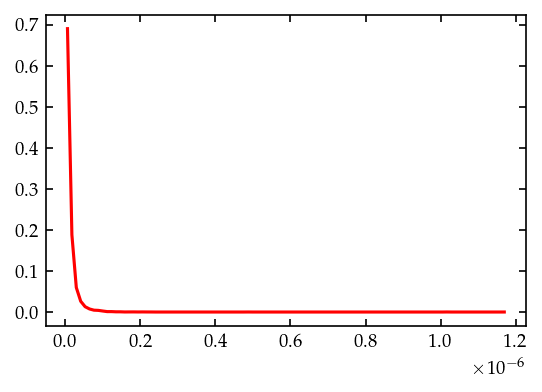

In [16]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_veff, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_veff, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()

NameError: name 'hot_radvel' is not defined

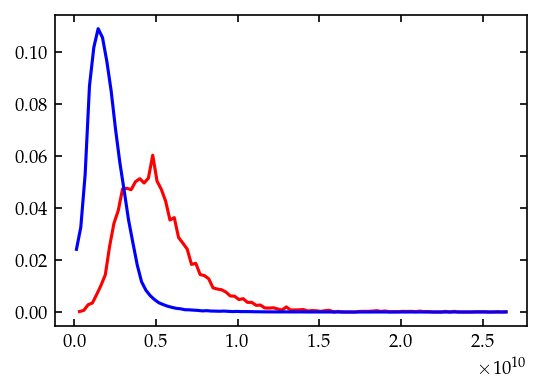

In [14]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(heated.Ve, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(discharged.Ve, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = pre_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,200)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting pre-discharge heated vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = hot_pre_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity (km/s)')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-70,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')
plt.show()

In [46]:
all_veff.max()

inf

ValueError: autodetected range of [1.764469043570846e-10, inf] is not finite

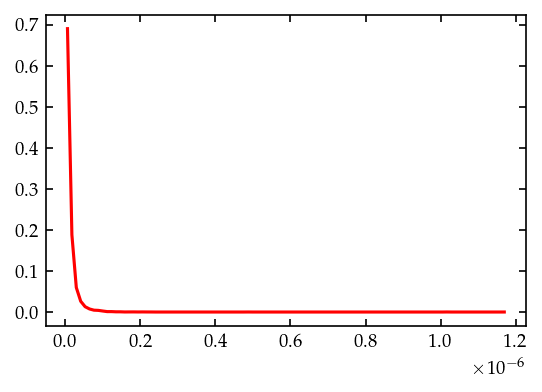

In [19]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(hot_veff, bins=100, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_veff, bins=100, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()

## Fractions of SNe-heated ejecta per $r/R_{vir}$ <a class="anchor" id="fractional"></a>

____
____

In this section, we commit to determining the fraction of discharged gas that is SNe-heated at different fractional distances $r/R_{vir}$. In particular, we use a key `r_Rvir` for each gas set such that, for every gas particle in these sets, we compute the fraction $r/R_{vir}$, where $r$ is the radial distance of the particle from its respective satellite galaxy and $R_{vir}$ is the virial radius of said satellite. Then for each value $r/R_{vir}$, the fraction of SNe-heated gas out of the total is computed.

We also perform such analysis to determine the fraction of ram pressure-stripped gas to the total of discharged gas at each $r/R_{vir}$.This is then used to gauge whether SNe feedback may be engaging on its own, or if it is also acting alongside ram pressure stripping. 

### Fraction SNe-heated per $r/R_{vir}$ <a class="anchor" id="fractionsne"></a>


In [3]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_discharged()

h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33
> Returning (predischarged, discharged, accreted, preheated, heated) for all available satellites <


In [4]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

In [5]:
# data has precalculated key 'r_per_Rvir' that we will use for our position computations; we unpack it here.

pre_rR = predischarged.r_per_Rvir
all_rR = discharged.r_per_Rvir
acc_rR = accreted.r_per_Rvir
preheat_rR = preheated.r_per_Rvir
hot_rR = heated.r_per_Rvir

In [231]:
# computing radial bins; i.e. radii of rings of equal area.

# def radialbins(particles, bincount=50, max=False):
#     if max == False:
#         outer1 = particles.r_per_Rvir.max()/bincount
#     else:
#         outer1 = max/bincount
    
#     area = np.pi * (outer1)**2
#     bins = np.array([max/bincount])
    
#     for i in range(1, bincount-1):
#         outer = np.sqrt((i+1) * area / np.pi)
#         bins = np.append(bins, outer)
#         i += 1
        
#     return bins


# the above version does not give bins up to the maximum that we want, so we opt for this version below instead.
def radialbins(particles, bincount=50, max=False):
    if max == False:
        totalrad = particles.r_per_Rvir.max()
    else:
        totalrad = max
    
    bins = np.array([totalrad/bincount])
    
    for i in range(1, bincount):
        outer = totalrad * np.sqrt(i / bincount)
        bins = np.append(bins, outer)
        i += 1
        
    return bins

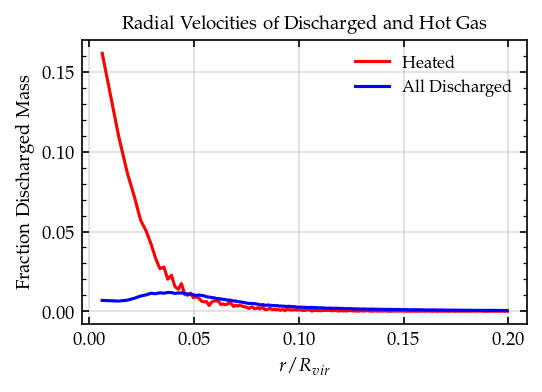

In [242]:
bincount = 300
bins = radialbins(discharged, bincount, 0.2)

### plotting heated r/Rvir alongside all discharged r/Rvir using the bining design defined above. ###
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'$r/R_{vir}$')
ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-50,150)
# ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

This binning strategy appears to work much better than when using numpy's standard binning technique; we will stick with this moving forward and confirm that it is a reasonable approach to take by making the above plot from the beginning of this notebook.

We now compute the fractions of discharged particles that were SNe-heated for each bin, and plot these fractions just as was done above for 'mass fractions.'

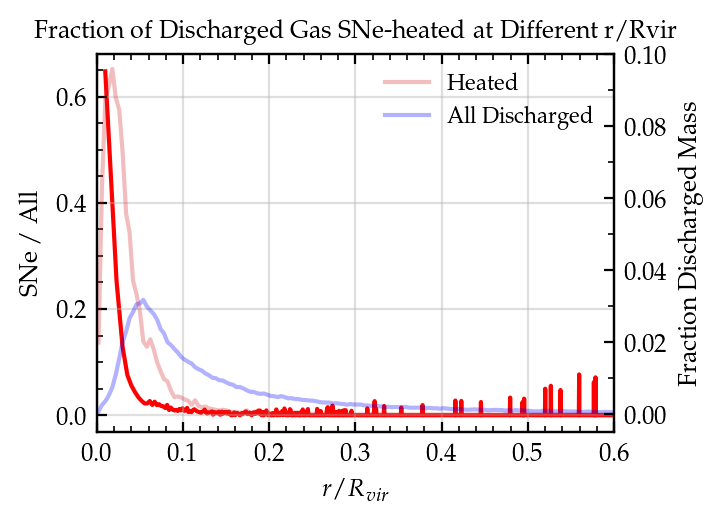

In [229]:
bincount = 1000
bins = radialbins(discharged, bincount,0.6)
bincenters = 0.5*(bins[1:] + bins[:-1])


# assigning particles in each set to equal sets of bins.
_all, x = np.histogram(all_rR, bins=bins)

_hot, x = np.histogram(hot_rR, bins=bins)

# computing fraction hot/all for each bin.
sne_ratio = np.array([])

for i in range(0, bincount-1):
    ratio = _hot[i]/_all[i]
    sne_ratio = np.append(sne_ratio, ratio)
    i += 1
    



### plotting fractions hot/all at different r/Rvir. ###
fig, ax1 = plt.subplots(1,1,dpi=200, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# fraction sne/all.
ax1.plot(bincenters, sne_ratio, label='SNe/All', c='r', zorder=-1000)

ax1.set_xlabel(r'$r/R_{vir}$')
ax1.set_ylabel('SNe / All')
ax1.tick_params(axis ='y') 


# original sne, all distributions; adding twin axes to plot.
ax2 = ax1.twinx()

bins=150
y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='Heated', c='tab:red', alpha=0.3, zorder = -1)

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='All Discharged', c='b', alpha=0.3, zorder=-1)


ax2.set_ylabel('Fraction Discharged Mass')  
ax2.tick_params(axis ='y') 


# labels, axis scaling, etc.
ax2.legend(frameon=False, fontsize='8')

ax1.set_title('Fraction of Discharged Gas SNe-heated at Different r/Rvir', fontsize='medium')
ax1.set_xlim(0,0.6)
# ax1.set_ylim(-0.1,0.7)
ax2.set_ylim(-0.005,0.1)


ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax1.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax1.tick_params(direction='in',which='both',right=True,top=True)
ax1.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

We calculate the same plot given above in the proceeding to compare the dynamic vs standard histogram binning. Evidently, the dynamic version would appear more useful.

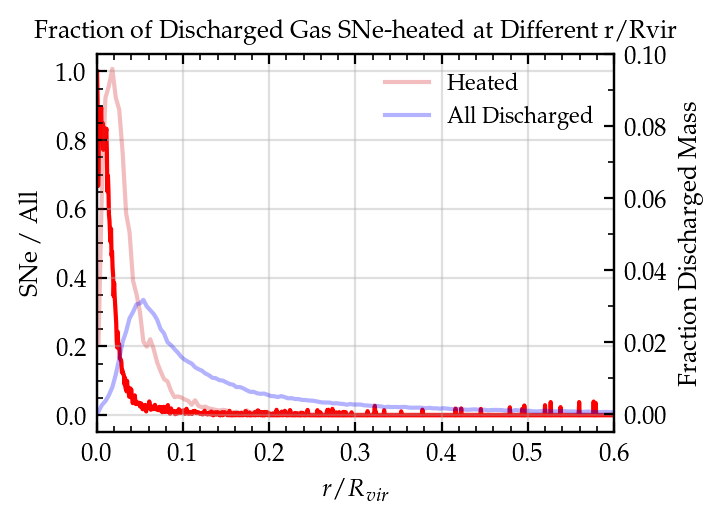

In [248]:
bincount = 1000
bins = radialbins(discharged, bincount,0.6)
bincenters = 0.5*(bins[1:] + bins[:-1])


# assigning particles in each set to equal sets of bins.
_all, x = np.histogram(all_rR, bins=bincount, range=(0,0.6))

_hot, x = np.histogram(hot_rR, bins=bincount, range=(0,0.6))

# computing fraction hot/all for each bin.
sne_ratio = np.array([])

for i in range(0, bincount):
    ratio = _hot[i]/_all[i]
    sne_ratio = np.append(sne_ratio, ratio)
    i += 1
    



### plotting fractions hot/all at different r/Rvir. ###
fig, ax1 = plt.subplots(1,1,dpi=200, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.

# fraction sne/all.
bincenters = 0.5*(x[1:] + x[:-1])
ax1.plot(bincenters, sne_ratio, label='SNe/All', c='r', zorder=-1000)

ax1.set_xlabel(r'$r/R_{vir}$')
ax1.set_ylabel('SNe / All')
ax1.tick_params(axis ='y') 


# original sne, all distributions; adding twin axes to plot.
ax2 = ax1.twinx()

bins=150
y1, x = np.histogram(hot_rR, bins=bins, weights=heated.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='Heated', c='tab:red', alpha=0.3, zorder = -1)

y1, x = np.histogram(all_rR, bins=bins, weights=discharged.weight, range=(0,0.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax2.plot(bincenters, y1, label='All Discharged', c='b', alpha=0.3, zorder=-1)


ax2.set_ylabel('Fraction Discharged Mass')  
ax2.tick_params(axis ='y') 


# labels, axis scaling, etc.
ax2.legend(frameon=False, fontsize='8')

ax1.set_title('Fraction of Discharged Gas SNe-heated at Different r/Rvir', fontsize='medium')
ax1.set_xlim(0,0.6)
# ax1.set_ylim(-0.1,0.7)
ax2.set_ylim(-0.005,0.1)


ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax1.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax1.tick_params(direction='in',which='both',right=True,top=True)
ax1.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')



### Fraction Ram Pressure-stripped per $r/R_{vir}$ <a class="anchor" id="fractionram"></a>



In [230]:
# later when there is time.

## Accretion of Discharged Gas <a class="anchor" id="accretion"></a>

Answering the question of what fraction of discharged gas returns to its respective satellite galaxy's disk after expulsion. Furthermore, however, we determine what fraction of sne heated gas indeed returns to the disk.

Of course, our study here hinges on many dependencies: For one, results here depend entirely on how we count gas particle accretion. In the first stage of the analysis here, we simply look at the timestep* after a particle has been discharaged; if it has returned to its satellite's disk in the timestep after discharge, then we count it as being accreted. 

Analysis to be performed later on will require looking at all timesteps (or some yet to be defined 'sufficient number') to determine if the particle is ever accreted, since the original approach ignores the potential for accretion more than one timestep after discharge.

--

*Note that each step in time is defined to be 1 Gigayear.


In [250]:
for i in range(0, len(accreted)):
    if accre

time      pid       rho          temp          mass  coolontime  \
0     11.214915  2202002  0.000120  53035.859375  28366.376150   10.908183   
0     12.507856  2202002  0.000027  16609.818359  29001.936444   12.388833   
2      9.921974  2857672  0.000126  58067.246094  27134.726367    9.669960   
4     10.767100  4073949  0.058975   9752.045898  26835.758536    0.000000   
4     11.214915  4073949  0.000031  54464.347656  26965.973341   11.058858   
...         ...      ...       ...           ...           ...         ...   
4348   9.383249  6628979  0.001709  21003.914062  26610.570287    0.000000   
4358   8.413543  6630126  0.063785  11265.299805  26755.941329    8.272644   
4361   7.767072  6630131  0.073664  11408.226562  26557.801505    0.000000   
4360   9.060013  6630131  0.001204  23144.421875  26557.970752    0.000000   
4368   8.090307  6630196  0.079972  11086.723633  26645.695937    7.904796   

              r  r_per_Rvir         x         y  ...  host_r_gal  sat_disk  \
0      6.698204    0.121201  0.612335 -0.205156  ...   19.203362     False   
0      8.954684    0.148129  8.203483 -3.552072  ...   17.758932     False   
2      7.982986    0.155638 -0.130506  7.981885  ...   20.680841     False   
4      0.849211    0.015786 -0.681446 -0.438338  ...   20.143633     False   
4     11.656469    0.210918 -5.592503  8.339077  ...   19.203362     False   
...         ...         ...       ...       ...  ...         ...       ...   
4348   2.218914    0.078645 -1.036233 -1.802731  ...    9.371077     False   
4358   0.819111    0.027533 -0.748168 -0.128032  ...   10.988910     False   
4361   1.238168    0.043742 -0.672080 -1.000479  ...   12.023541     False   
4360   9.890922    0.359088  5.622277 -2.603158  ...   11.555198     False   
4368   0.840242    0.028677  0.797118 -0.087680  ...   11.540393     False   

      sat_halo  host_disk  host_halo  other_sat    IGM       angle      key  \
0         True      False      False      False  False  134.055296  h148_13   
0         True      False      False      False  False   46.365776  h148_13   
2         True      False      False      False  False   95.014185  h148_13   
4         True      False      False      False  False   12.792650  h148_13   
4         True      False      False      False  False   53.294073  h148_13   
...        ...        ...        ...        ...    ...         ...      ...   
4348      True      False      False      False  False   55.149343  h329_33   
4358      True      False      False      False  False   53.793614  h329_33   
4361      True      False      False      False  False  135.597690  h329_33   
4360      True      False      False      False  False   52.192600  h329_33   
4368      True      False      False      False  False  133.845505  h329_33   

        weight  
0     0.000005  
0     0.000005  
2     0.000004  
4     0.000004  
4     0.000004  
...        ...  
4348  0.000004  
4358  0.000004  
4361  0.000004  
4360  0.000004  
4368  0.000004  

[241104 rows x 63 columns]

In [253]:
accreted

time      pid        rho          temp          mass  coolontime  \
0     10.783935  2202002   0.142927   8746.030273  28038.187315    1.502397   
0     12.076876  2202002   0.131769   7552.754883  28840.956689   10.908183   
2      9.060013  2857672   2.172691   2506.807373  26593.440078    0.000000   
4     10.352954  4073949   0.525808   4238.500000  26658.696866    0.000000   
4     10.783935  4073949   0.332782   2948.533447  26839.452610    0.000000   
...         ...      ...        ...           ...           ...         ...   
4351   7.767072  6628859   2.757110   8886.482422  26513.626324    0.000000   
4353   8.608831  6628979   0.123141  10599.953125  26589.511131    0.000000   
4358   8.090307  6630126   0.315700  10079.164062  26695.281840    0.000000   
4361   8.736778  6630131   0.115406  10597.738281  26557.970752    0.000000   
4368   7.767072  6630196  15.163758   4397.125977  26513.325825    0.000000   

             r  r_per_Rvir         x         y  ...     r_gal  host_r_gal  \
0     0.601453    0.011168 -0.119313 -0.324524  ...  0.703272   18.586025   
0     0.329223    0.005613  0.111963 -0.214933  ...  0.786578   18.811293   
2     0.369888    0.007470  0.273438 -0.185580  ...  0.862794   17.831585   
4     0.514738    0.009778 -0.412274  0.303749  ...  0.716398   19.590469   
4     0.687113    0.012759 -0.619439 -0.231153  ...  0.703272   18.586025   
...        ...         ...       ...       ...  ...       ...         ...   
4351  0.291548    0.010300  0.031189  0.212495  ...  0.538882   12.023541   
4353  0.424728    0.036870  0.224581  0.310447  ...  0.376808    9.596679   
4358  0.406475    0.013873 -0.381672  0.139252  ...  0.384223   11.540393   
4361  3.622564    0.246604 -0.620991 -0.292862  ...  0.384998   11.289288   
4368  0.168881    0.005966 -0.055559 -0.062482  ...  0.538882   12.023541   

      sat_disk  sat_halo  host_disk  host_halo  other_sat    IGM      key  \
0         True     False      False      False      False  False  h148_13   
0         True     False      False      False      False  False  h148_13   
2         True     False      False      False      False  False  h148_13   
4         True     False      False      False      False  False  h148_13   
4         True     False      False      False      False  False  h148_13   
...        ...       ...        ...        ...        ...    ...      ...   
4351      True     False      False      False      False  False  h329_33   
4353      True     False      False      False      False  False  h329_33   
4358      True     False      False      False      False  False  h329_33   
4361      True     False      False      False      False  False  h329_33   
4368      True     False      False      False      False  False  h329_33   

        weight  
0     0.000006  
0     0.000006  
2     0.000005  
4     0.000005  
4     0.000005  
...        ...  
4351  0.000005  
4353  0.000005  
4358  0.000005  
4361  0.000005  
4368  0.000005  

[194090 rows x 62 columns]

In [281]:
# pulling out a subset of 'discharged' containing those discharged particles with pids that match the pids of those
# in 'accreted'; calling it 'accdis'; the masking technique.

# Ids of preheated
x = np.array(discharged['pid'])
# Ids of discharged, SNe heated gas
y = np.array(accreted['pid'])

index = np.argsort(x)
sorted_x = x[index] # Sorted list of ids pre discharged                        
sorted_index = np.searchsorted(sorted_x, y)
yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y
result = np.ma.array(yindex, mask=mask)
accdis = discharged.iloc[result[~result.mask].data]

In [282]:
# looking for unique pids so that we don't doublecount particles that are discharged and accreted several times.

m = np.zeros_like(accdis.pid, dtype=bool)
m[np.unique(accdis.pid, return_index=True)[1]] = True
accdis.pid[~m]

0       2202002
4       4073949
8       4340176
22      6936050
24      6988228
         ...   
4304    6627480
4305    6627481
4338    6627712
4341    6627722
4348    6627757
Name: pid, Length: 91634, dtype: int64

In [273]:
# looking for unique pids so that we don't doublecount particles that are discharged and accreted several times.
pidlis = np.array(accreted.pid)
pid_exclude = np.array([])

for i in range(0, len(accreted)):
    for j in range(0, len(accreted)):
        if pidlis[i] == pidlis[j]:
            pid = pidlis[i]
            pid_exclude = np.append(pid_exclude, pid)

KeyboardInterrupt: 

In [275]:
len(pid_exclude)

3136

In [ ]:
pidlis = np.array(accreted.pid)
pid_exclude = np.array([])

for i in range(0, len(accreted)):
    for j in range(0, len(accreted)):
        if pidlis[i] == pidlis[j]:
            pid = pidlis[i]
            pid_exclude = np.append(pid_exclude, pid)
        stop()

## Code Testing <a class="anchor" id="proving"></a>

Testing out different data types and computations.

In [270]:
accreted.pid

0       2202002
0       2202002
2       2857672
4       4073949
4       4073949
         ...   
4351    6628859
4353    6628979
4358    6630126
4361    6630131
4368    6630196
Name: pid, Length: 194090, dtype: int64